In [23]:
import os
import pathlib
from pathlib import Path
import re

import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from math import sqrt
from statistics import mean
from statistics import stdev

In [3]:
import matplotlib.pyplot as plt

In [4]:
def create_dir(home,dir,resample,model_name,prop,GSHT):
    if home==None:
        home=os.getcwd()
    try:
            os.mkdir("{}/CV/".format(home))
    except:
            pass
    os.chdir("{}/CV/".format(home))
    try:
        os.mkdir("{}".format(resample))
    except:
            pass
    os.chdir("{}".format(resample))
    try:
        os.mkdir("{}".format(model_name))
    except:
            pass
    os.chdir("{}".format(model_name))
    try:
        os.mkdir("{}".format(prop))
    except:
            pass
    os.chdir("{}".format(prop))
    try:
        os.mkdir("{}".format(GSHT))
    except:
            pass
    os.chdir("{}".format(GSHT))

    os.chdir("{}".format(home))
    return

In [5]:
dir="SK-learn"
f'{os.getcwd()}/{dir}'

'/users/qdb16186/SK-learn'

In [7]:
# path="{}/{}/CV/{}/{}/{}/{}".format(os.getcwd(),dir,resample,model_name,prop,GSHT)

In [ ]:
p = Path(f'{os.getcwd()}/{dir}/')
somelist=list(p.glob('**/*.csv'))
len(somelist)
print(list(filter(lambda x : re.search(r"{6}.1234\s{3}SD",x) ,somelist)))

In [119]:
p = Path('./SK-learn/CV/')
# for pth in p.iterdir('**/*.csv'):
somelist=list(p.glob('**/KNN/Granulated/dG/*.csv'))
    # print(pth)
    # if pth.name.startswith(''):
        # print(pth)
len(somelist)/50

somelist[:10]
# pd.DataFrame(somelist[0].absolute())
somelist[0].resolve()
# somelist[0].absolute().parts
somelist[0].absolute().name
somelist[0].resolve().absolute().as_posix()
# pd.DataFrame(somelist[0].resolve().absolute().as_posix())
# pd.DataFrame('~/users/qdb16186/SK-learn/CV/34/KNN/Granulated/dG/Split_34_type_train_pipe_cond_Scalling.csv')

'/users/qdb16186/SK-learn/CV/34/KNN/Granulated/dG/Split_34_type_train_pipe_cond_Scalling.csv'

In [8]:
def list_analysis(results_filename,stats_filename,                 
                    r2sck_list,r2_list,rmsd_list,
                    bias_list,sdep_list,name):
    
    
    # Average results over resamples:
    r2sck_av = mean(r2sck_list)
    r2_av = mean(r2_list)
    rmsd_av = mean(rmsd_list)
    bias_av = mean(bias_list)
    sdep_av = mean(sdep_list)


    # Sample Standard deviation results over resamples
    r2sck_std = stdev(r2sck_list)
    r2_std = stdev(r2_list)
    rmsd_std = stdev(rmsd_list)
    bias_std = stdev(bias_list)
    sdep_std = stdev(sdep_list)

    # Write average results to a file:
    results_file = open(results_filename+name, 'w')
    results_file.write('r2sck: {} ± {}\n'.format('{0:.2f}'.format(r2sck_av),'{0:.2f}'.format(r2sck_std)))
    results_file.write('r2: {} ± {}\n'.format('{0:.2f}'.format(r2_av),'{0:.2f}'.format(r2_std)))
    results_file.write('rmsd: {} ± {}\n'.format('{0:.2f}'.format(rmsd_av),'{0:.2f}'.format(rmsd_std)))
    results_file.write('bias: {} ± {}\n'.format('{0:.2f}'.format(bias_av),'{0:.2f}'.format(bias_std)))
    results_file.write('sdep: {} ± {}\n'.format('{0:.2f}'.format(sdep_av),'{0:.2f}'.format(sdep_std)))      
    results_file.close()

    ## Write statistiscs lists to a file:
    stats_file = open(stats_filename+name, 'w')
    stats_file.writelines('List r2sck: {}\n'.format(str(r2sck_list)))
    stats_file.writelines('List r2: {}\n'.format(str(r2_list)))
    stats_file.writelines('List rmsd: {}\n'.format(str(rmsd_list)))
    stats_file.writelines('List bias: {}\n'.format(str(bias_list)))
    stats_file.writelines('List sdep: {}\n'.format(str(sdep_list)))
    stats_file.close()

In [9]:
def plot_err(result,name,set_name,stats_list,model_name,descriptor_name):
    df2_av=result

    y_test = df2_av['y_true'].mean(axis=1)
    y_pred_test = df2_av['y_pred'].mean(axis=1)
    yerr= df2_av['y_pred'].std(axis=1)
    
    
#     Load list
    r2sck_list,rmsd_list,bias_list,sdep_list=stats_list
    # r2sck_list,r2_list,rmsd_list,bias_list,sdep_list=stats_list
    # Average results over resamples:
    r2 = '{:.3f}'.format(np.mean(np.asarray(r2sck_list,float)))
    rmsd = '{:.3f}'.format(np.mean(np.asarray(rmsd_list,float)))
    bias = '{:.3f}'.format(np.mean(np.asarray(bias_list,float)))
    sdep = '{:.3f}'.format(np.mean(np.asarray(sdep_list,float)))
    # Sample Standard deviation results over resamples
    r2_sd = '{:.3f}'.format(np.std(np.asarray(r2sck_list,float)))
    rmsd_sd = '{:.3f}'.format(np.std(np.asarray(rmsd_list,float)))
    bias_sd = '{:.3f}'.format(np.std(np.asarray(bias_list,float)))
    sdep_sd = '{:.3f}'.format(np.std(np.asarray(sdep_list,float)))


    fig, ax = plt.subplots()   

     # Line of best fit
    try:
        a, b = np.polyfit(y_test, y_pred_test, 1)
        plot_a = '{:.3f}'.format(a)
        plot_b = '{:.3f}'.format(b)
    except np.linalg.LinAlgError:
        pass

    # Plot everything
    try:
#         Tab tittle
        if name=='T':
            plt.title(f'{model_name} | ${name}_m$ | {descriptor_name} | {set_name} set')
            plt.plot([], [], ' ', label=f'{model_name} | ${name}_m$ | {set_name} set')
        elif name=='S':
            plt.title(f'{model_name} | Δ{name} | {descriptor_name} | {set_name} set')
            plt.plot([], [], ' ', label=f'{model_name} | Δ{name} | {set_name} set')
        else:
            plt.title(f'{model_name} | Δ{name} | {descriptor_name} | {set_name} set')
            plt.plot([], [], ' ', label=f'{model_name} | Δ{name} | {set_name} set')

#         Stats
        plt.plot([], [], ' ', label=f'$R^{2}$ : {r2} $\pm$ {r2_sd} ')
        plt.plot([], [], ' ', label=f'RMSD : {rmsd} $\pm$ {rmsd_sd} ')
        plt.plot([], [], ' ', label=f'Bias : {bias} $\pm$ {bias_sd} ')
        plt.plot([], [], ' ', label=f'SDEP : {sdep} $\pm$ {sdep_sd} ')
#         provide information about the gradient
        plt.plot([], [], ' ', label=f'y = {plot_a}x + {plot_b}')       
#         plot scatter plot
        plt.scatter(y_test, y_pred_test)
#         Plot error bars
        plt.errorbar(y_test, y_pred_test, yerr=yerr, fmt='none',ecolor='black',elinewidth=0.8,capsize=2,
                    barsabove=False)
#     plot line of best fit
        plt.plot(y_test, a * y_test + b, color='purple')
        order = [0,1,2,3,4,5]
    except NameError:
        pass

    # x=y line
    lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
           ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # Legend
#     Axis labes
    if name=='T':
        plt.xlabel(f' ${name}_m$ True (°C)')
        plt.ylabel(f' ${name}_m$ Pred (°C)')
    elif name=='S':
        plt.xlabel(f' Δ{name} True (cal/mol/K)')
        plt.ylabel(f' Δ{name} Pred (cal/mol/K)')
    else:
        plt.xlabel(f' Δ{name} True (kcal/mol)')
        plt.ylabel(f' Δ{name} Pred (kcal/mol)')
#     legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    leg.get_frame().set_linewidth(0.0)
#     Most crucail -> file name! 
    fig.savefig(f'Resamples_mean_std_{model_name}_{set_name}_{name}_{descriptor_name}.png', bbox_inches='tight', dpi=800)
#     clear and close fig
    plt.clf()
    plt.cla()
    plt.close(fig)

In [10]:
def bias_fn(y, y_pred, **kwargs):
    # Bias
    bias = np.mean(y_pred - y)
    return bias  

def sdep_fn(y, y_pred, **kwargs):
    # Standard deviation of the error of prediction
    sdep=sqrt(np.mean(((y_pred - y) - (np.mean (y_pred - y)))**2))
    return sdep

def rmsd_fn(y,y_pred,**kwargs):
    # Root mean squared error
    rmsd=sqrt(mean_squared_error(y, y_pred))
    return rmsd

# "r2": make_scorer(r2_score,greater_is_better=True)
# "R2": make_scorer(explained_variance_score,greater_is_better=True)

In [11]:
scalling='No_scalling'
set_name= ' Test' 
model_name= 'KNN'
descriptor_name = "Granulated" 
prop='G'

def produce_plots(scalling,set_name,model_name,descriptor_name,prop):
    os.chdir('/users/qdb16186')
    home=os.getcwd()
    
    p = Path('./SK-learn/CV/')
    # for pth in p.iterdir('**/*.csv'):
    
    if prop == 'T':
        somelist=list(p.glob(f'**/{model_name}/{descriptor_name}/{prop}m/*_type_test_pipe_cond_{scalling}.csv'))
    else:
        somelist=list(p.glob(f'**/{model_name}/{descriptor_name}/d{prop}/*_type_test_pipe_cond_{scalling}.csv'))
    len(somelist)
    bias_list=[]
    sdep_list=[]
    rmsd_list=[]
    r2___list=[]
    test_data=pd.DataFrame(columns=['ID'])
    stacked_data=pd.DataFrame()
    for i in somelist:
        df=pd.read_csv(i.resolve().absolute().as_posix())
        y=df['y_true']
        y_pred=df['y_pred']
        bias_list.append( bias_fn(y, y_pred))
        sdep_list.append( sdep_fn(y, y_pred))
        rmsd_list.append( rmsd_fn(y, y_pred))
        r2___list.append(r2_score(y, y_pred))
    
        test_data=pd.concat([test_data,df.set_index('ID')],axis=1)
        stacked_data=pd.concat([stacked_data,df],axis=0)
    stats_list = [r2___list,rmsd_list,bias_list,sdep_list]
    try:
        os.mkdir(f'{scalling}')
    except:
        pass
    os.chdir(f"{scalling}")
    plot_err(test_data,prop, set_name, stats_list,model_name,descriptor_name)
    
    os.chdir(home)

In [216]:
scalling='No_scalling'
set_name= ' Test' 
model_name= 'KNN'
descriptor_name = "Granulated" 
prop='G'

for scalling in ['No_scalling', 'Scalling']:
    for set_name in ['Test', ' Train']:
        for model_name in ['KNN', 'RF']:
            for descriptor_name in ['Granulated','OHEP','CountDNA','LP_dec2']:
                for prop in ['G', 'H', 'S', 'T']:
                    produce_plots(scalling,set_name,model_name,descriptor_name,prop)

# Single Task

In [476]:
scalling='No_scalling'
set_name= ' Test' 
model_name= 'CNN_single_task'
descriptor_name = "Granulated" 
prop='G'

for scalling in ['No_scalling']:
    for set_name in ['Test']:#, ' Train']:
        for model_name in ['CNN_single_task']:
            for descriptor_name in ['LP_dec2']:#'Granulated','OHEP','LP_dec2']:
                for prop in ['G', 'H', 'S', 'T']:

                    os.chdir('/users/qdb16186')
                    home=os.getcwd()
                    
                    p = Path('./CNN_eval/CV/')
                    # for pth in p.iterdir('**/*.csv'):
                    
                    if prop == 'T':
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_16_core/{descriptor_name}/{prop}m/*_type_test_pipe_cond_{scalling}.csv'))
                    else:
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_16_core/{descriptor_name}/d{prop}/*_type_test_pipe_cond_{scalling}.csv'))
                    len(somelist)
                    bias_list=[]
                    sdep_list=[]
                    rmsd_list=[]
                    r2___list=[]
                    test_data=pd.DataFrame(columns=['ID'])
                    stacked_data=pd.DataFrame()
                    filter_count=1
                    for i in somelist:
                        # if prop == 'H' and filter_count in [9, 43, 53, 59]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'S' and filter_count in [7, 67, 69, 77]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'G' and filter_count in [1,3,7,13,25,33,39,45,47,61,73,75,77]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'T' and filter_count in [7,9,13,33,43,55,57,59,67,73,75,83]:
                        #     filter_count+=2
                        #     pass
                        # else:
                        #     filter_count+=2
                            df=pd.read_csv(i.resolve().absolute().as_posix())
                            y=df['y_true']
                            y_pred=df['y_pred']
                            
                            bias_list.append( bias_fn(y, y_pred))
                            sdep_list.append( sdep_fn(y, y_pred))
                            rmsd_list.append( rmsd_fn(y, y_pred))
                            r2___list.append(r2_score(y, y_pred))
                        
                            test_data=pd.concat([test_data,df.set_index('ID')],axis=1)
                            stacked_data=pd.concat([stacked_data,df],axis=0)
                    stats_list = [r2___list,rmsd_list,bias_list,sdep_list]
                    try:
                        os.mkdir(f'{scalling}')
                    except:
                        pass
                    os.chdir(f"{scalling}")
                    plot_err(test_data,prop, set_name, stats_list,model_name,descriptor_name)
                    
                    os.chdir(home)

# Single Task New


In [80]:
scalling='No_scalling'
set_name= ' Test' 
model_name= 'CNN_single_task'
descriptor_name = "Granulated" 
prop='G'
n_jobs=10
for scalling in ['No_scalling']:
    for set_name in ['Test']:#, ' Train']:
        for model_name in ['CNN_single_task']:
            for descriptor_name in ['DNA-Groups']: #['DNA-Groups','Granulated','OHEP','LP_dec2']:
                for prop in ['T']: #['G', 'H', 'S', 'T']:

                    os.chdir('/users/qdb16186')
                    home=os.getcwd()
                    
                    p = Path('./CNN_single_task_grid/CV/')
                    # for pth in p.iterdir('**/*.csv'):
                    
                    if prop == 'T':
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_{prop}m_{n_jobs}/{descriptor_name}/{prop}m/*_type_test_best_grid.csv'))
                    else:
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_d{prop}_{n_jobs}/{descriptor_name}/d{prop}/*_type_test_best_grid.csv'))
                    len(somelist)
                    bias_list=[]
                    sdep_list=[]
                    rmsd_list=[]
                    r2___list=[]
                    test_data=pd.DataFrame(columns=['ID'])
                    stacked_data=pd.DataFrame()
                    filter_count=1
                    for i in somelist:
                        # if prop == 'H' and filter_count in [9, 43, 53, 59]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'S' and filter_count in [7, 67, 69, 77]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'G' and filter_count in [1,3,7,13,25,33,39,45,47,61,73,75,77]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'T' and filter_count in [7,9,13,33,43,55,57,59,67,73,75,83]:
                        #     filter_count+=2
                        #     pass
                        # else:
                        #     filter_count+=2
                            df=pd.read_csv(i.resolve().absolute().as_posix())
                            y=df['y_true']
                            y_pred=df['y_pred']
                            
                            bias_list.append( bias_fn(y, y_pred))
                            sdep_list.append( sdep_fn(y, y_pred))
                            rmsd_list.append( rmsd_fn(y, y_pred))
                            r2___list.append(r2_score(y, y_pred))
                        
                            test_data=pd.concat([test_data,df.set_index('ID')],axis=1)
                            stacked_data=pd.concat([stacked_data,df],axis=0)
                    stats_list = [r2___list,rmsd_list,bias_list,sdep_list]
                    try:
                        os.mkdir(f'{scalling}')
                    except:
                        pass
                    os.chdir(f"{scalling}")
                    plot_err(test_data,prop, set_name, stats_list,model_name,descriptor_name)
                    
                    os.chdir(home)

NameError: name 'bias_fn' is not defined

In [775]:
# plot_err(test_data,prop, set_name, stats_list,model_name,descriptor_name)
# df2_av=test_data
# y_test = df2_av['y_true']
# y_test
df
# test_data=pd.concat([test_data,df.set_index('ID')],axis=1)
test_data
# somelist
# for i in range(40,50):
#     print(i, " ", r2___list[i])

# 32,44
count=-1
for i in somelist:
        count+=1
        if count==32:
            df=pd.read_csv(i.resolve().absolute().as_posix())
            y=df['y_true']
            y_pred=df['y_pred']
            print( bias_fn(y, y_pred))
            print( sdep_fn(y, y_pred))
            print( rmsd_fn(y, y_pred))
            print(r2_score(y, y_pred))


-1.2349074554347836
13.66695331048693
13.722631278822517
-12.894404097687069


In [825]:
len(r2___list)

50

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Replace this with your actual list of numbers
data = r2__list
# data.pop(32)
# data.pop(42)

# Create a histogram
sns.histplot(data, kde=True, stat="density", bins=10)

# Overlay with a normal distribution curve
mu, sigma = np.mean(data), np.std(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
p = norm.pdf(x,mu,sigma)
plt.plot(x, p, 'k', linewidth=1)

# Set labels and title
plt.xlabel("Data")
plt.ylabel("Density")
plt.title("Histogram with Normal Distribution Overlay")

# Show the plot
plt.show()

In [806]:
(-y_pred).idxmax()
df[5:]

,ID,y_true,y_pred
5,57,-9.5,-9.288949
6,28,-7.7,-7.611271
7,142,-13.2,-144.701200
8,279,-6.8,-7.409788


In [1]:
test_data
# somelist
# test_data
# for prop in ['G', 'H', 'S', 'T']:

#                     os.chdir('/users/qdb16186')
#                     home=os.getcwd()
                    
#                     p = Path('./CNN_single_task/CV/')
#                     # for pth in p.iterdir('**/*.csv'):
                    
#                     if prop == 'T':
#                         somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_{prop}m_15/{descriptor_name}/{prop}m/*_type_test_pipe_cond_{scalling}.csv'))
#                     else:
#                         somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_d{prop}_15/{descriptor_name}/d{prop}/*_type_test_pipe_cond_{scalling}.csv'))
#                     len(somelist)

NameError: name 'test_data' is not defined

In [651]:
model_name
descriptor_name
test_data

,ID,y_true,y_pred,y_true,y_pred,y_true,y_pred,y_true,y_pred,y_true,...,y_true,y_pred,y_true,y_pred,y_true,y_pred,y_true,y_pred,y_true,y_pred
139,NaN,38.9,22.415972,NaN,NaN,38.9,24.456507,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,NaN,39.8,22.364376,NaN,NaN,39.8,24.360980,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,36.6,22.359451,NaN,NaN,NaN,NaN,NaN,NaN,36.6,...,NaN,NaN,36.6,22.762087,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,35.9,22.453667,NaN,NaN,NaN,NaN,35.9,22.336721,NaN,...,NaN,NaN,35.9,23.076973,NaN,NaN,35.9,18.864414,35.9,20.565403
201,NaN,44.3,22.376568,44.3,16.982435,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.3,38.923107,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.0,23.005058,NaN,NaN,39.0,18.856852,39.0,20.595491
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,61.2,38.174550,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.6,20.96488,NaN,NaN,35.6,29.631243,35.6,18.924700,35.6,20.518118
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40.3,22.824830,40.3,28.648785,NaN,NaN,NaN,NaN


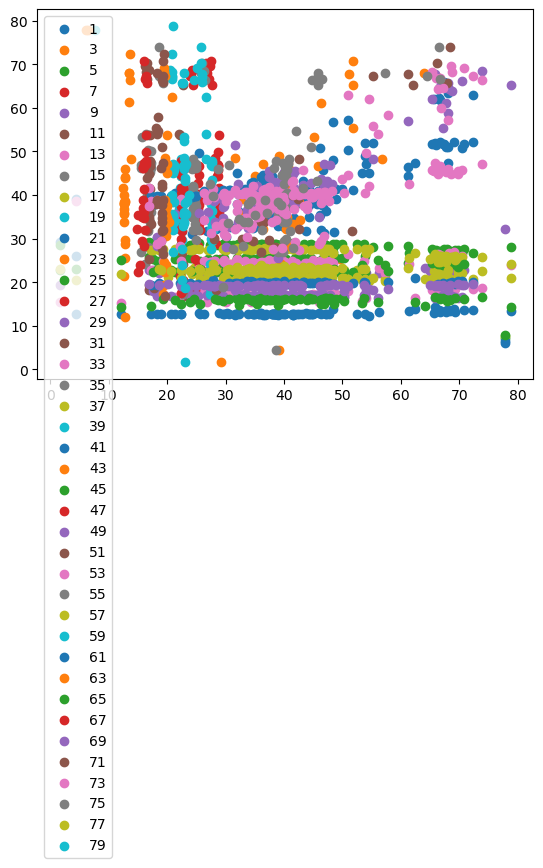

In [674]:
len(test_data.columns)
#  H -> # 9, 43, 53, 59

#  S -># 7, 67, 69, 77

# G 1,3,7,13,25,33,39,45,47,61,73,75,77
# T 7,9,13,33,43,55,57,59,67,73,75,83
i=12
fig, ax = plt.subplots()
# plt.scatter(test_data.iloc[:,(i)], test_data.iloc[:,(i+1)])
# plt.scatter(test_data['y_true'], test_data['y_pred'])
for i in range(1,100,2):

#     # if test_data.iloc[:,(i+1)].between(-5,1).any():
#     #     print(i)
#     # else:
#     #     plt.scatter(test_data.iloc[:,(i)], test_data.iloc[:,(i+1)])
#     # input()

    plt.scatter(test_data.iloc[:,(i)], test_data.iloc[:,(i+1)])
     
#     # else:
#     #     plt.scatter(test_data.iloc[:,(i)*2], test_data.iloc[:,(i*2+1)])

ax.legend(labels=range(1,100,2))
# plt.clf()
i=87
# plt.scatter(test_data.iloc[:,(i)], test_data.iloc[:,(i+1)])
t=test_data.iloc[:,[87,89]]>130
# t.drop("False")
# t.to_csv('t.csv')

In [644]:
test_data.iloc[:,[i,(i+1)]].to_csv('t.csv')

In [342]:
test_data.iloc[:,(i+1)].between(-5,1).any()

False

,ID,y_true,y_pred,y_true,y_pred,y_true,y_pred,y_true,y_pred,y_true,...,y_true,y_pred,y_true,y_pred,y_true,y_pred,y_true,y_pred,y_true,y_pred
242,NaN,-93.7,-90.805730,NaN,NaN,-93.7,-85.491190,-93.7,-89.38495,-93.7,...,-93.7,-83.686530,-93.7,-85.198020,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,-67.8,-53.734505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,NaN,-60.6,-54.699190,-60.6,-57.927383,NaN,NaN,NaN,NaN,NaN,...,-60.6,-61.230824,NaN,NaN,-60.6,-63.049100,NaN,NaN,NaN,NaN
298,NaN,-112.5,-118.708046,-112.5,-121.735480,NaN,NaN,NaN,NaN,NaN,...,-112.5,-115.074875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,-58.6,-57.721313,NaN,NaN,-58.6,-57.340168,NaN,NaN,NaN,...,-58.6,-57.368250,NaN,NaN,NaN,NaN,-58.6,-57.575016,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-64.2,-61.482838,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-60.7,-57.083110,NaN,NaN,-60.7,-57.064170,-60.7,-57.993977,-60.7,-58.819935
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-63.8,-62.659042,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-38.6,-42.114080,NaN,NaN,-38.6,-43.359215,NaN,NaN,NaN,NaN


In [3]:
scalling='No_scalling'
set_name= ' Test' 
model_name= 'CNN_single_task'
descriptor_name = "Granulated" 
prop='G'
test_data1=pd.DataFrame(columns=['params'])

for scalling in ['No_scalling']:
    for set_name in ['Test']:#, ' Train']:
        for model_name in ['CNN_single_task']:
            for descriptor_name in ['Granulated']:#['Granulated','OHEP','LP_dec2']:
                for prop in ['T']:#['G', 'H', 'S', 'T']:

                    os.chdir('/users/qdb16186')
                    home=os.getcwd()
                    
                    p = Path('./CNN_single_task_grid/CV/')
                    # for pth in p.iterdir('**/*.csv'):
                    
                    if prop == 'T':
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_{prop}m_10/{descriptor_name}/{prop}m/gridsearch_*_{scalling}.csv'))
                    else:
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_d{prop}_10/{descriptor_name}/d{prop}/gridsearch_*_{scalling}.csv'))
                    if len(somelist) ==0:
                        break
                    bias_list=[]
                    sdep_list=[]
                    rmsd_list=[]
                    r2___list=[]
                    test_data=pd.DataFrame(columns=['params'])
                    stacked_data=pd.DataFrame()
                    # filter_count=1
                    filter_count=0
                    for i in somelist:
                            filter_count+=1
                        # if prop == 'H' and filter_count in [9, 43, 53, 59]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'S' and filter_count in [7, 67, 69, 77]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'G' and filter_count in [1,3,7,13,25,33,39,45,47,61,73,75,77]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'T' and filter_count in [7,9,13,33,43,55,57,59,67,73,75,83]:
                        #     filter_count+=2
                        #     pass
                        # else:
                        #     filter_count+=2
                            df=pd.read_csv(i.resolve().absolute().as_posix())
                            # y=df['y_true']
                            # y_pred=df['y_pred']
                            
                            # bias_list.append( bias_fn(y, y_pred))
                            # sdep_list.append( sdep_fn(y, y_pred))
                            # rmsd_list.append( rmsd_fn(y, y_pred))
                            # r2___list.append(r2_score(y, y_pred))
                        
                            test_data=pd.concat([test_data,df.set_index('params')],axis=1)
                            
                            stacked_data=pd.concat([stacked_data,df],axis=0)

                            new_names = [(i,i+f'_{filter_count}') for i in df.iloc[:, :].columns.values]
                            df.rename(columns = dict(new_names), inplace=True)
                            test_data1=pd.concat([test_data1,df.set_index(f'params_{filter_count}')],axis=1)
                    # stats_list = [r2___list,rmsd_list,bias_list,sdep_list]
                    try:
                        os.mkdir(f'{scalling}')
                    except:
                        pass
                    os.chdir(f"{scalling}")
                    # plot_err(test_data,prop, set_name, stats_list,model_name,descriptor_name)
                    
                    os.chdir(home)

In [13]:
# df

In [4]:
df.columns
# df[('param_convn_50','param_dense1_50', 'param_dense2_50', 'param_dense3_50')]
# 'mean_fit_time_50', 'mean_test_r2_50', 'mean_test_rmse_50', 'mean_test_bias_50', 'mean_test_sdep_50'
# 'Unnamed: 0_50'
# df.iloc[:,['mean_fit_time_50', 'mean_test_r2_50', 'mean_test_rmse_50', 'mean_test_bias_50', 'mean_test_sdep_50']]
new_df = df[['Unnamed: 0_50','params_50','param_convn_50','param_dense1_50', 'param_dense2_50', 'param_dense3_50','mean_fit_time_50', 'mean_test_r2_50', 'mean_test_rmse_50', 'mean_test_bias_50', 'mean_test_sdep_50']]
# new_df = df[['Unnamed: 0_50','params_50','param_convn_50','param_dense1_50', 'param_dense2_50', 'param_dense3_50','mean_fit_time_50', 'mean_test_r2_50', 'mean_test_rmse_50', 'mean_test_sdep_50']]
# df['Column_Name'] = pd.to_numeric(df['Column_Name'], errors='coerce')

In [5]:
new_df

,Unnamed: 0_50,params_50,param_convn_50,param_dense1_50,param_dense2_50,param_dense3_50,mean_fit_time_50,mean_test_r2_50,mean_test_rmse_50,mean_test_bias_50,mean_test_sdep_50
0,0,"{'convn': 3, 'dense1': 16, 'dense2': 16, 'dens...",3,16,16,8,34.531269,0.941019,-3.108046,-0.905633,-2.925514
1,1,"{'convn': 3, 'dense1': 16, 'dense2': 16, 'dens...",3,16,16,16,34.280776,0.942225,-3.129829,-0.894200,-2.861779
2,2,"{'convn': 3, 'dense1': 16, 'dense2': 16, 'dens...",3,16,16,32,41.147930,0.933439,-3.291227,-0.736686,-2.904065
3,3,"{'convn': 3, 'dense1': 16, 'dense2': 16, 'dens...",3,16,16,64,28.192368,0.940929,-3.131175,-0.901365,-2.875576
4,4,"{'convn': 3, 'dense1': 16, 'dense2': 32, 'dens...",3,16,32,8,26.908047,0.934691,-3.378058,-1.181275,-2.995781
...,...,...,...,...,...,...,...,...,...,...,...
103,103,"{'convn': 1, 'dense1': 64, 'dense2': 32, 'dens...",1,64,32,64,35.210134,0.891765,-4.243635,-0.842949,-4.103082
104,104,"{'convn': 1, 'dense1': 64, 'dense2': 64, 'dens...",1,64,64,8,27.944868,0.870886,-4.685659,0.064483,-4.590827
105,105,"{'convn': 1, 'dense1': 64, 'dense2': 64, 'dens...",1,64,64,16,27.896253,0.858551,-4.968279,-0.298906,-4.849297
106,106,"{'convn': 1, 'dense1': 64, 'dense2': 64, 'dens...",1,64,64,32,31.581118,0.859290,-4.958297,-0.836734,-4.717249


In [57]:
np.all(np.isreal(list(temp.columns)))
np.isreal([1,2,3,4])

array([ True,  True,  True,  True])

In [7]:

# for i in df[['Unnamed: 0_50','param_convn_50','param_dense1_50', 'param_dense2_50', 'param_dense3_50','mean_fit_time_50', 'mean_test_sdep_50']].columns:
#     new_df[i] /= new_df[i].max()

# Set up the parallel coordinates plot
fig, ax = plt.subplots(figsize=(10, 6))

temp=new_df[['param_convn_50','param_dense1_50', 'param_dense2_50', 'param_dense3_50','mean_fit_time_50', 'mean_test_r2_50']]
for i in temp.columns:
    
    temp[i]=pd.to_numeric(temp[i],errors='coerce')

# Plot parallel coordinates
pd.plotting.parallel_coordinates(temp, 'mean_fit_time_50',
                                axvlines=False,
                                sort_labels=True)
                                # axvlines_kwds(x=0, ymin==0, ymax==1))
                                # axvlines_kwds)#, color=['blue', 'green', 'orange', 'red'])#, ax=ax)
plt.axvline(x=3, color='red', linestyle='--', label='Vertical Line at x=3')

# Customize labels, title, etc.
ax.set_xlabel('Hyperparameters')
ax.set_ylabel('Values')
ax.set_title('Parallel Coordinates Plot - Hyperparameters vs. Accuracy')

# ax.legend(lines, new_df['params_50'], loc='upper left', bbox_to_anchor=(1, 1))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=45)#, ha='right')

ax2 = ax.twiny()
ax2.plot([11, 12, 31, 41, 15,35], color='blue')

# Show the plot
plt.show()

NameError: name 'plt' is not defined

In [106]:
temp.columns

Index(['param_convn_50', 'param_dense1_50', 'param_dense2_50',
       'param_dense3_50', 'mean_fit_time_50', 'mean_test_r2_50'],
      dtype='object')

In [23]:
# !pip install jupyterlab-plotly
!conda install -c conda-forge jupyterlab-plotly
# !pip install --upgrade plotly
# !pip install --upgrade notebook

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
- 

In [17]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [16]:
import plotly
plotly.__version__

'5.18.0'

In [16]:
# !pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 38.7 MB/s eta 0:00:00m eta 0:00:010:01:01


In [66]:
df_['mean_test_r2_50'] < 0

0      False
1      False
2      False
3      False
4      False
       ...  
103    False
104    False
105    False
106    False
107    False
Name: mean_test_r2_50, Length: 108, dtype: bool

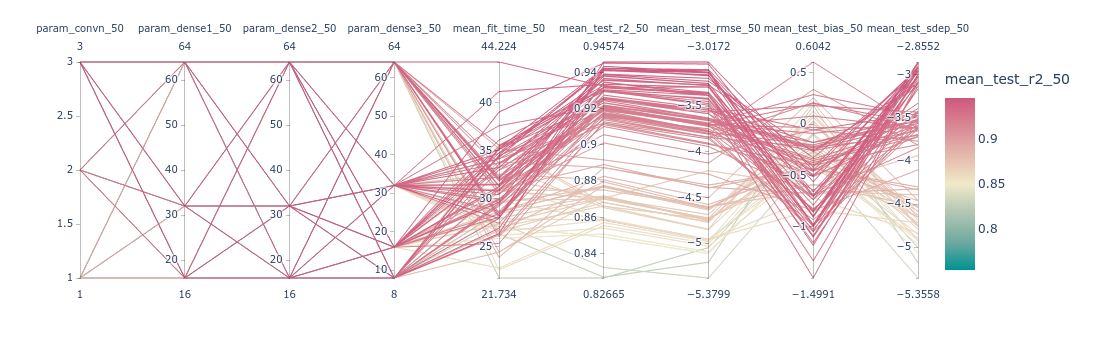

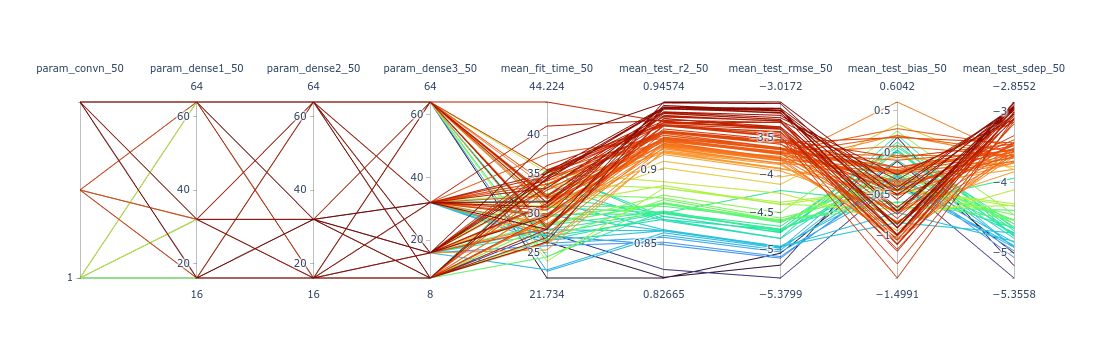

In [77]:
import plotly
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import plotly.express as px

import plotly.graph_objs as go
# Set notebook mode to work in offline
# import plotly.offline as pyo
# pyo.init_notebook_mode()
df_ = df.copy()
df_=df_.loc[df_["mean_test_r2_50"] > 0 ]
# color     : Values from this column are used to assign color to the poly lines.
# dimensions: Values from these columns form the axes in the plot.
df_["mean_test_r2_50"] = df_["mean_test_r2_50"].astype(float)
fig = px.parallel_coordinates(df_, color="mean_test_r2_50", dimensions=['param_convn_50', 'param_dense1_50', 'param_dense2_50',
       'param_dense3_50', 'mean_fit_time_50', 'mean_test_r2_50', 'mean_test_rmse_50', 'mean_test_bias_50', 'mean_test_sdep_50'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              # color_continuous_scale=px.colors.sequential.Viridis,
                              # color_continuous_scale=[(0, "red"), (0.5, "green"), (1, "blue")],
                                # colorscale = 'agsunset',
                              color_continuous_midpoint=0.85,
                             )

fig.show()

dimensions = list([ 
                    dict(range=(df_['param_convn_50'].min(), df_['param_convn_50'].max()),tickvals = df_['param_convn_50'], ticktext = df_['param_convn_50'],label='param_convn_50', values=df_['param_convn_50']),
                    dict(range=(df_['param_dense1_50'].min(),df_['param_dense1_50'].max()),label='param_dense1_50', values=df_['param_dense1_50']),
                    dict(range=(df_['param_dense2_50'].min(),df_['param_dense2_50'].max()),label='param_dense2_50', values=df_['param_dense2_50']),
                    dict(range=(df_['param_dense3_50'].min(), df_['param_dense3_50'].max()),label='param_dense3_50', values=df_['param_dense3_50']),
                    dict(range=(df_['mean_fit_time_50'].min(), df_['mean_fit_time_50'].max()),label='mean_fit_time_50', values=df_['mean_fit_time_50']),
                    dict(range=(df_['mean_test_r2_50'].min(), df_['mean_test_r2_50'].max()),label='mean_test_r2_50', values=df_['mean_test_r2_50']),
                    dict(range=(df_['mean_test_rmse_50'].min(), df_['mean_test_rmse_50'].max()),label='mean_test_rmse_50', values=df_['mean_test_rmse_50']),
                    dict(range=(df_['mean_test_bias_50'].min(), df_['mean_test_bias_50'].max()),label='mean_test_bias_50', values=df_['mean_test_bias_50']),
                    dict(range=(df_['mean_test_sdep_50'].min(), df_['mean_test_sdep_50'].max()),label='mean_test_sdep_50', values=df_['mean_test_sdep_50']),

                         ])

fig = go.Figure(data= go.Parcoords(line = dict(color = df_['mean_test_r2_50'], colorscale = 'turbo'), dimensions = dimensions))

fig.show()
# fig.write_image("fig1.png")
# https://www.analyticsvidhya.com/blog/2021/11/visualize-data-using-parallel-coordinates-plot/

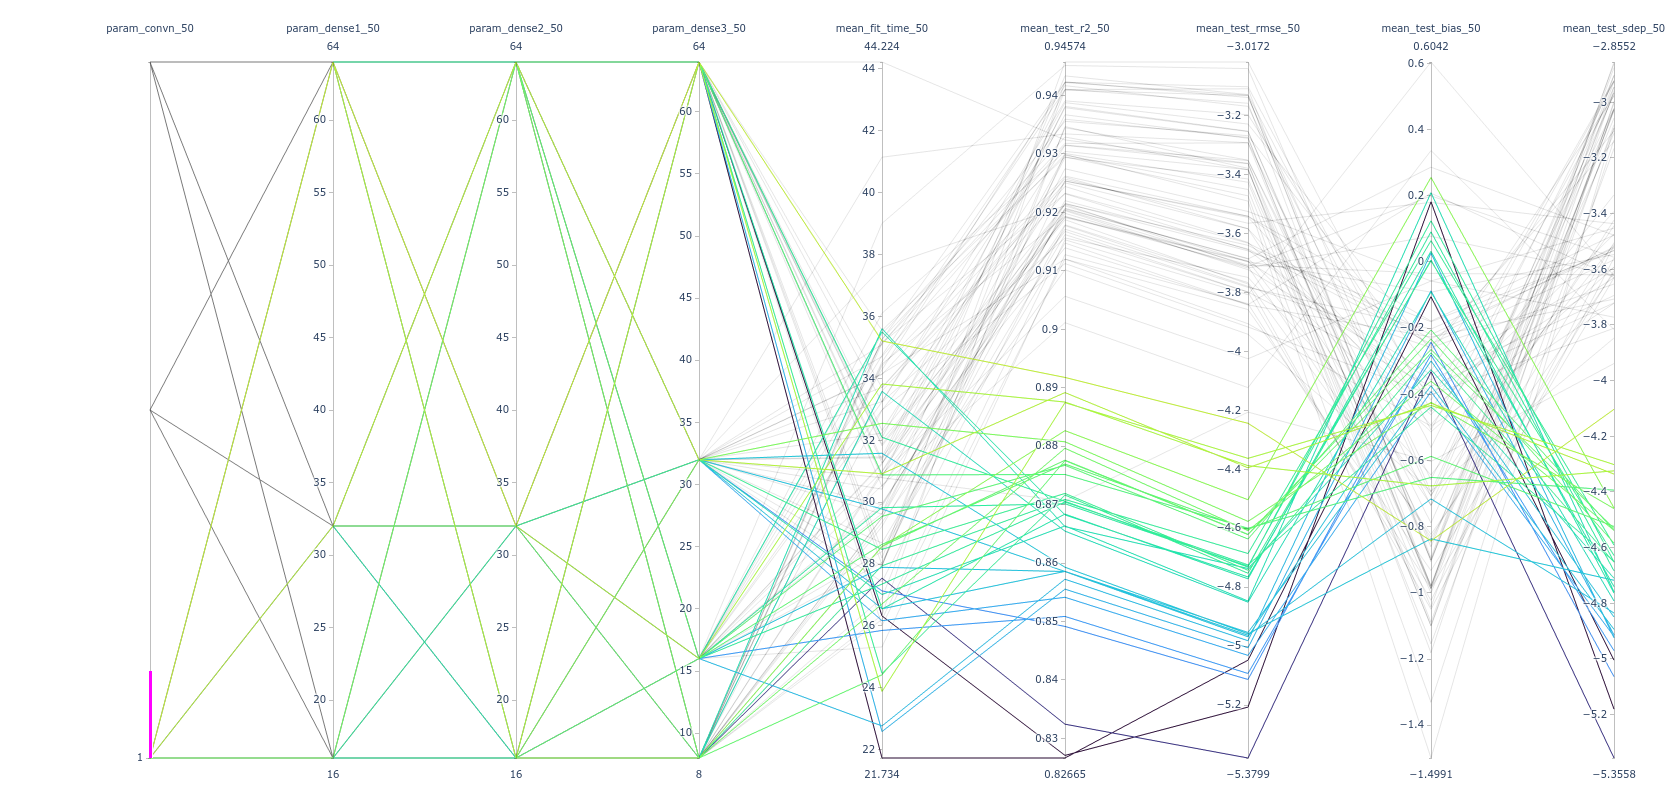

In [78]:
fig.update_layout(width=1200, height=800,margin=dict(l=150, r=60, t=60, b=40))
fig.show()

In [ ]:
# ! pip install plotly notebook

In [19]:
import plotly.express as px
# %matplotlib inline
data = {
    'Feature1': [1, 2, 3, 4],
    'Feature2': [4, 3, 2, 1],
    'Feature3': [2, 3, 1, 4],
    'Feature4': [3, 1, 4, 2]
}

df2 = pd.DataFrame(data)
# Assuming df is your DataFrame
# fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
# fig=px.parallel_coordinates(df2, color="Feature1", labels={"Feature1": "Label for Feature1"})
# fig.show()

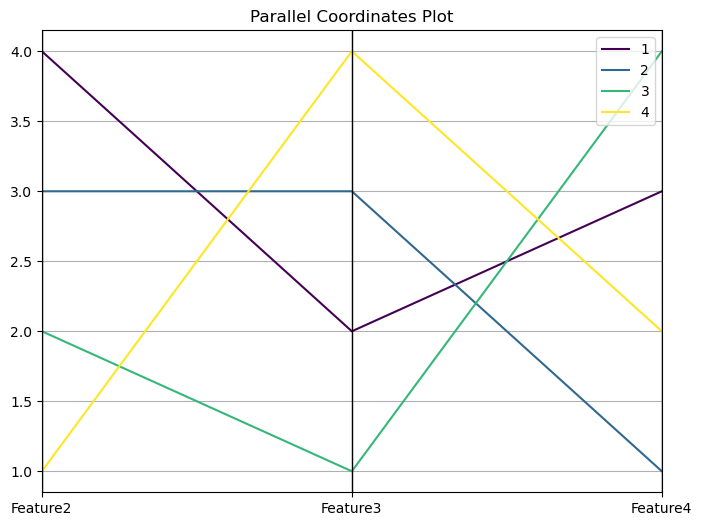

In [15]:
plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(df2, 'Feature1', colormap='viridis')

plt.title('Parallel Coordinates Plot')
plt.show()

In [20]:
data = {
    'Run': ['Run1', 'Run2', 'Run3', 'Run4'],
    'Learning Rate': [0.001, 0.01, 0.1, 0.01],
    'Batch Size': [32, 64, 128, 64],
    'Accuracy': [0.85, 0.88, 0.92, 0.87],
}

# Create a DataFrame from the data
df2 = pd.DataFrame(data)

# # Set up subplots
# fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# # Plot learning rate
# axs[0].plot(df2['Run'], df2['Learning Rate'], marker='o', color='blue')
# axs[0].set_ylabel('Learning Rate')
# axs[0].set_title('Learning Rate, Batch Size, and Accuracy vs. Run')

# # Plot batch size
# axs[1].plot(df2['Run'], df2['Batch Size'], marker='o', color='green')
# axs[1].set_ylabel('Batch Size')

# # Plot accuracy
# axs[2].plot(df2['Run'], df2['Accuracy'], marker='o', color='red')
# axs[2].set_xlabel('Run')
# axs[2].set_ylabel('Accuracy')

# # Customize layout
# plt.tight_layout()

# # Show the plot
# plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'normalize'

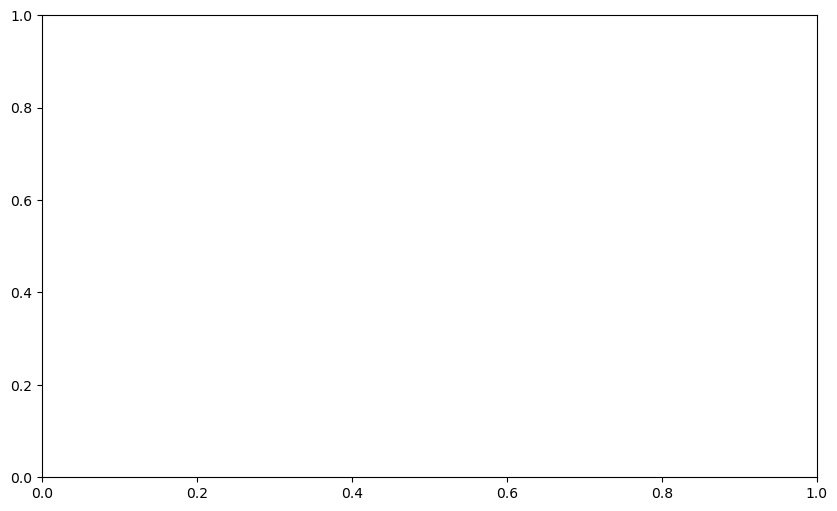

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot parallel coordinates
pd.plotting.parallel_coordinates(df2, 'Run', color=['blue', 'green', 'orange', 'red'], ax=ax, normalize='Batch Size')

# Customize labels, title, etc.
ax.set_xlabel('Run')
ax.set_ylabel('Values')
ax.set_title('Parallel Coordinates Plot - Hyperparameters vs. Accuracy')

# Add axis ticks and labels
# ax.set_yticks(range(len(df2['Learning Rate'])))
# ax.set_yticklabels(df2['Learning Rate'])
# ax.tick_params(axis='y', rotation=45)

# ax.set_xticks(range(len(df2['Run'])-1))
# # ax.set_xticklabels(['', 'Run1', 'Batch Size', 'Run2', '', 'Run3', '', 'Run4'])
# # ax.set_yticklabels(['Run1', 'Batch Size', 'Run2'])
# ax.tick_params(axis='x', rotation=45)#, ha='right')

# ax.text(0, 0.001, '0.001', ha='right', va='center', color='blue', fontsize=8)
# ax.text(1, 0.01, '0.01', ha='right', va='center', color='green', fontsize=8)
# ax.text(2, 32, '32', ha='right', va='center', color='orange', fontsize=8)
# ax.text(3, 0.85, '0.85', ha='right', va='center', color='red', fontsize=8)


# Show the plot
plt.show()

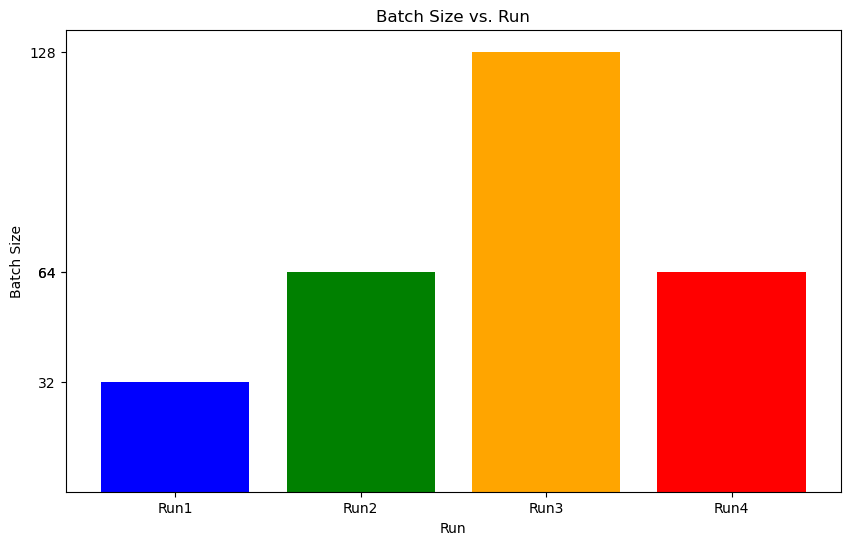

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'Batch Size' values
ax.bar(df2['Run'], df2['Batch Size'], color=['blue', 'green', 'orange', 'red'])

# Customize labels, title, etc.
ax.set_xlabel('Run')
ax.set_ylabel('Batch Size')
ax.set_title('Batch Size vs. Run')

# Add y-axis tick labels
ax.set_yticks(df2['Batch Size'])
ax.set_yticklabels(df2['Batch Size'])

# Show the plot
plt.show()

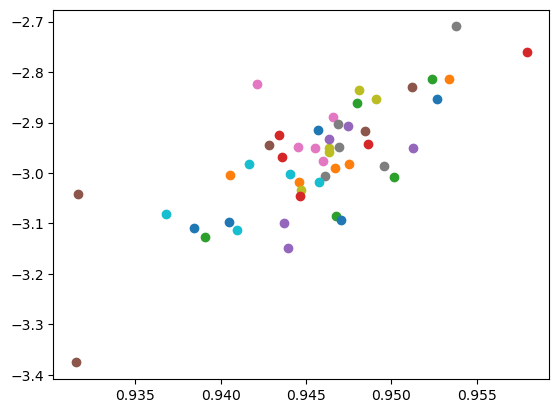

In [751]:
hyp_params=[]
for i in range(1,51):
    plt.scatter(test_data1[f'mean_test_r2_{i}'].max(), test_data1[f'mean_test_rmse_{i}'].max())
    hyp_params.append(test_data1[f'mean_test_rmse_{i}'].idxmax())
# df
# somelist
# test_data1
# test_data1[f'mean_test_r2_{i}'].max()
# hyp_params.count()

# l = ['a','a','b','c','c']
df = pd.DataFrame({'params': hyp_params})
# df.groupby('params', as_index=True).size().plot(kind='bar')
# plt.show()
# df

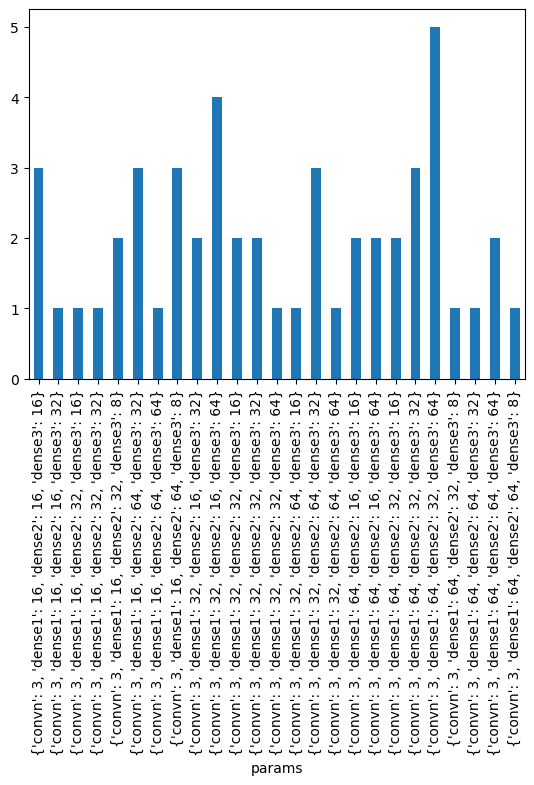

In [752]:
df.groupby('params', as_index=True).size().plot(kind='bar')
plt.show()

# Grid Search

In [11]:
scalling='No_scalling'
set_name= ' Test' 
model_name= 'CNN_single_task'
descriptor_name = "Granulated" 
prop='G'
test_data1=pd.DataFrame(columns=['params'])
for scalling in ['No_scalling']:
    for set_name in ['Test']:#, ' Train']:
        for model_name in ['CNN_single_task']:
            for descriptor_name in ['Granulated']:#'Granulated','OHEP','LP_dec2']:
                for prop in ['H']:#['G', 'H', 'S', 'T']:

                    os.chdir('/users/qdb16186')
                    home=os.getcwd()
                    
                    p = Path('./CNN_eval/CV/')
                    # for pth in p.iterdir('**/*.csv'):
                    
                    if prop == 'T':
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_16_core/{descriptor_name}/{prop}m/gridsearch_*_{scalling}.csv'))
                    else:
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}_16_core/{descriptor_name}/d{prop}/gridsearch_*_{scalling}.csv'))
                    len(somelist)
                    bias_list=[]
                    sdep_list=[]
                    rmsd_list=[]
                    r2___list=[]
                    test_data=pd.DataFrame(columns=['params'])
                    stacked_data=pd.DataFrame()
                    # filter_count=1
                    filter_count=0
                    for i in somelist:
                            filter_count+=1
                        # if prop == 'H' and filter_count in [9, 43, 53, 59]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'S' and filter_count in [7, 67, 69, 77]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'G' and filter_count in [1,3,7,13,25,33,39,45,47,61,73,75,77]:
                        #     filter_count+=2
                        #     pass
                        # elif prop == 'T' and filter_count in [7,9,13,33,43,55,57,59,67,73,75,83]:
                        #     filter_count+=2
                        #     pass
                        # else:
                        #     filter_count+=2
                            df=pd.read_csv(i.resolve().absolute().as_posix())
                            # y=df['y_true']
                            # y_pred=df['y_pred']
                            
                            # bias_list.append( bias_fn(y, y_pred))
                            # sdep_list.append( sdep_fn(y, y_pred))
                            # rmsd_list.append( rmsd_fn(y, y_pred))
                            # r2___list.append(r2_score(y, y_pred))
                        
                            test_data=pd.concat([test_data,df.set_index('params')],axis=1)
                            
                            stacked_data=pd.concat([stacked_data,df],axis=0)

                            new_names = [(i,i+f'_{filter_count}') for i in df.iloc[:, :].columns.values]
                            df.rename(columns = dict(new_names), inplace=True)
                            test_data1=pd.concat([test_data1,df.set_index(f'params_{filter_count}')],axis=1)
                    # stats_list = [r2___list,rmsd_list,bias_list,sdep_list]
                    try:
                        os.mkdir(f'{scalling}')
                    except:
                        pass
                    os.chdir(f"{scalling}")
                    # plot_err(test_data,prop, set_name, stats_list,model_name,descriptor_name)
                    
                    os.chdir(home)

In [610]:
test_data1.T

,"{'convn': 3, 'dense1': 32, 'dense2': 32, 'dense3': 8}","{'convn': 3, 'dense1': 32, 'dense2': 32, 'dense3': 32}"
params,NaN,NaN
Unnamed: 0_1,0,1
mean_fit_time_1,25.284316,25.24025
std_fit_time_1,0.503315,0.608498
mean_score_time_1,0.17305,0.172816
...,...,...
split2_train_sdep_50,-2.392046,-2.436898
split3_train_sdep_50,-2.585943,-2.406636
split4_train_sdep_50,-2.505901,-2.408928
mean_train_sdep_50,-2.377225,-2.339778


69.02


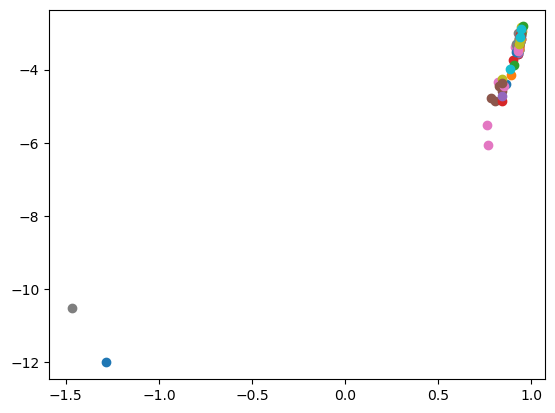

In [671]:
print(len(test_data1.columns)/50)
# fig, ax = plt.subplots()
r2_new_list=[]
rmse_new_list=[]
plt.scatter(test_data1[f'mean_test_r2_3'], test_data1[f'mean_test_rmse_3'])
for i in range(1,50):
    plt.scatter(test_data1[f'mean_test_r2_{i}'], test_data1[f'mean_test_rmse_{i}'])
    r2_new_list.append(test_data1[f'mean_test_r2_{i}'])
    rmse_new_list.append(test_data1[f'mean_test_rmse_{i}'])
    # print(f'resample{i} ' + 'rmse = {:.3f} '.format((test_data1[f'mean_test_rmse_{i}'].max())) + ' r2 = {:.3f}'.format((test_data1[f'mean_test_r2_{i}'].max()))
    #      + " " + pd.DataFrame(test_data1.idxmax()).T[f'mean_test_rmse_{i}'])
    # f.write(f'resample{i} ' + 'rmse = {:.3f} '.format((test_data1[f'mean_test_rmse_{i}'].max())) + ' r2 = {:.3f}'.format((test_data1[f'mean_test_r2_{i}'].max()))
    #      + " " + pd.DataFrame(test_data1.idxmax()).T[f'mean_test_rmse_{i}'])
         
# plt.scatter(test_data1['mean_test_r2_1'], test_data1['mean_test_rmse_1'])
# lims = [
#             np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#             np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
#            ]
# ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(0,1)
# ax.set_ylim(-20,0)
# # mean_test_r2
# ax
# pd.DataFrame(test_data1.idxmax()).T[f'mean_test_rmse_{i}']

# Save to text outputfile
# with open('output2.txt', 'a') as f:
#     for i in range(1,50):
#         f.write(f'resample{i} ' + 'rmse = {:.3f} '.format((test_data1[f'mean_test_rmse_{i}'].max())) + ' r2 = {:.3f}'.format((test_data1[f'mean_test_r2_{i}'].max()))
#              + " " + str(pd.DataFrame(test_data1.idxmax()).T[f'mean_test_rmse_{i}'][0])+'\n')
#     f.close()
# pd.DataFrame(test_data1[f'mean_test_r2_3']).to_csv('inspect_new3.csv')

In [564]:
pd.DataFrame(test_data1.idxmax()).T[f'mean_test_rmse_{i}'][0]

/tmp/ipykernel_474601/3068287104.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  pd.DataFrame(test_data1.idxmax()).T[f'mean_test_rmse_{i}'][0]


"{'convn': 0, 'dense1': 8, 'dense2': 8, 'dense3': 0}"

In [318]:
test_data

i.resolve().absolute().as_posix()
# len(somelist)
df=pd.read_csv(i.resolve().absolute().as_posix())
df
test_data
test_data=pd.DataFrame(columns=['ID'])
for i in somelist:
        df=pd.read_csv(i.resolve().absolute().as_posix())
        y=df['y_true']
        y_pred=df['y_pred']
        bias_list.append( bias_fn(y, y_pred))
        sdep_list.append( sdep_fn(y, y_pred))
        rmsd_list.append( rmsd_fn(y, y_pred))
        r2___list.append(r2_score(y, y_pred))
        test_data=pd.concat([test_data,df.set_index('ID')],axis=1,ignore_index=False)
test_data
# test_data=pd.DataFrame(columns=['ID'])
# pd.concat([test_data,df.set_index(['ID'])],axis=1,ignore_index=True)
# plt.scatter(test_data['y_true'], test_data['y_pred'])
test_data['y_pred']>-5
test_data['y_pred']

,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,...,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred
242,-90.805730,NaN,-85.491190,-89.38495,-2.236099,NaN,-91.131065,NaN,NaN,NaN,...,-83.889370,NaN,-86.992180,NaN,NaN,-83.686530,-0.610424,NaN,NaN,NaN
213,-53.734505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-71.811270,NaN,NaN,NaN,NaN,NaN
185,-54.699190,-57.927383,NaN,NaN,NaN,NaN,-67.511635,-62.107994,NaN,NaN,...,-60.234604,NaN,NaN,NaN,NaN,-61.230824,NaN,-63.049100,NaN,NaN
298,-118.708046,-121.735480,NaN,NaN,NaN,NaN,NaN,-114.516350,NaN,NaN,...,NaN,-122.556470,NaN,NaN,NaN,-115.074875,NaN,NaN,NaN,NaN
23,-57.721313,NaN,-57.340168,NaN,NaN,-58.34771,NaN,-57.146120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-57.368250,NaN,NaN,-57.575016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-54.415657,NaN,-73.000656,NaN,NaN,-61.482838,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-56.747566,-56.839893,NaN,NaN,-65.952700,-57.083110,NaN,-57.064170,-57.993977,-57.591087
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.610424,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-41.659360,-43.818090,NaN,NaN,-42.114080,NaN,-43.359215,NaN,NaN


# Param Grid

In [694]:
from sklearn.model_selection import ParameterGrid
param_grid = {'dense1': [8, 16,32,64,128], 
              'dense2': [8, 16,32,64,128],
              'dense3': [8, 16,32,64,128],
              'conv1': [8, 16,32,64,128],
              'conv2': [8, 16,32,64,128],
              'conv3': [8, 16,32,64,128]
             }

param_grid = {'dense1': [8, 16,32,64,128], 
              'dense2': [8, 16,32,64,128],
              'dense3': [8, 16,32,64,128],
             }

param_grid = {'dense1': [8, 16,32,64,128], 
              'dense2': [8, 16,32,64,128],
              
             }

param_grid = {'dense1': [8, 16,32,64,128], 
             }


param_grid = {'dense1': [8, 16,32,64,128], 
              'dense2': [8, 16,32,64,128],
              'dense3': [8, 16,32,64,128],
              'conv1': [8, 16,32,64,128]
             }

param_grid = {'dense1': [8, 16,32,64,128], 
              'dense2': [8, 16,32,64,128],
              'conv1': [8, 16,32,64,128]
              
             }

param_grid = {'dense1': [8, 16,32,64,128], 
              'conv1': [8, 16,32,64,128]
             }

param_grid = {'dense1': [8, 16,32,64,128], 
              'dense2': [8, 16,32,64,128],
              'dense3': [8, 16,32,64,128],
              'conv1': [8, 16,32,64,128]
             }
param_grid = {'dense1': [8, 16,32,64,128], 
              'conv1': [8, 16,32,64,128]
             }
param_grid = { "dense1":[16,32,64],
                 "dense2":[16,32,64],
                 "dense3":[8,16,32,64],
                 'convn':[3,2,1]}


param_grid ={
"model_type1": ['CNN3', 'CNN2', 'CNN1'], 
"model_type":  ['Dense3'], 
"layer_1 ": [16, 32, 64, 128],
"layer_2_2 ": [16, 32, 64, 128],
"layer_3_3 ": [16, 32, 64]}

In [848]:
len(list(ParameterGrid(param_grid)))
# list(ParameterGrid(param_grid))

144

#Multi_task_2

In [650]:
def plot_err_prop(result,name,set_name,stats_list,model_name,descriptor_name,prop):
    df2_av=result

    y_test = df2_av[f'{prop}_true'].mean(axis=1)
    y_pred_test = df2_av[f'{prop}_pred'].mean(axis=1)
    yerr= df2_av[f'{prop}_pred'].std(axis=1)
    
    
#     Load list
    r2sck_list,rmsd_list,bias_list,sdep_list=stats_list
    # r2sck_list,r2_list,rmsd_list,bias_list,sdep_list=stats_list
    # Average results over resamples:
    r2 = '{:.3f}'.format(np.mean(np.asarray(r2sck_list,float)))
    rmsd = '{:.3f}'.format(np.mean(np.asarray(rmsd_list,float)))
    bias = '{:.3f}'.format(np.mean(np.asarray(bias_list,float)))
    sdep = '{:.3f}'.format(np.mean(np.asarray(sdep_list,float)))
    # Sample Standard deviation results over resamples
    r2_sd = '{:.3f}'.format(np.std(np.asarray(r2sck_list,float)))
    rmsd_sd = '{:.3f}'.format(np.std(np.asarray(rmsd_list,float)))
    bias_sd = '{:.3f}'.format(np.std(np.asarray(bias_list,float)))
    sdep_sd = '{:.3f}'.format(np.std(np.asarray(sdep_list,float)))


    fig, ax = plt.subplots()   

     # Line of best fit
    try:
        a, b = np.polyfit(y_test, y_pred_test, 1)
        plot_a = '{:.3f}'.format(a)
        plot_b = '{:.3f}'.format(b)
    except np.linalg.LinAlgError:
        pass

    # Plot everything
    try:
#         Tab tittle
        if name=='T':
            plt.title(f'{model_name} | ${name}_m$ | {descriptor_name} | {set_name} set')
            plt.plot([], [], ' ', label=f'{model_name} | ${name}_m$ | {set_name} set')
        elif name=='S':
            plt.title(f'{model_name} | Δ{name} | {descriptor_name} | {set_name} set')
            plt.plot([], [], ' ', label=f'{model_name} | Δ{name} | {set_name} set')
        else:
            plt.title(f'{model_name} | Δ{name} | {descriptor_name} | {set_name} set')
            plt.plot([], [], ' ', label=f'{model_name} | Δ{name} | {set_name} set')

#         Stats
        plt.plot([], [], ' ', label=f'$R^{2}$ : {r2} $\pm$ {r2_sd} ')
        plt.plot([], [], ' ', label=f'RMSD : {rmsd} $\pm$ {rmsd_sd} ')
        plt.plot([], [], ' ', label=f'Bias : {bias} $\pm$ {bias_sd} ')
        plt.plot([], [], ' ', label=f'SDEP : {sdep} $\pm$ {sdep_sd} ')
#         provide information about the gradient
        plt.plot([], [], ' ', label=f'y = {plot_a}x + {plot_b}')       
#         plot scatter plot
        plt.scatter(y_test, y_pred_test)
#         Plot error bars
        plt.errorbar(y_test, y_pred_test, yerr=yerr, fmt='none',ecolor='black',elinewidth=0.8,capsize=2,
                    barsabove=False)
#     plot line of best fit
        plt.plot(y_test, a * y_test + b, color='purple')
        order = [0,1,2,3,4,5]
    except NameError:
        pass

    # x=y line
    lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
           ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # Legend
#     Axis labes
    if name=='T':
        plt.xlabel(f' ${name}_m$ True (°C)')
        plt.ylabel(f' ${name}_m$ Pred (°C)')
    elif name=='S':
        plt.xlabel(f' Δ{name} True (cal/mol/K)')
        plt.ylabel(f' Δ{name} Pred (cal/mol/K)')
    else:
        plt.xlabel(f' Δ{name} True (kcal/mol)')
        plt.ylabel(f' Δ{name} Pred (kcal/mol)')
#     legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    leg.get_frame().set_linewidth(0.0)
#     Most crucail -> file name! 
    fig.savefig(f'Resamples_mean_std_{model_name}_{set_name}_{name}_{descriptor_name}.png', bbox_inches='tight', dpi=600)
#     clear and close fig
    plt.clf()
    plt.cla()
    plt.close(fig)

In [310]:
scalling='No_scalling'
set_name= ' Test' 
model_name= 'CNN_multi_task_4'
descriptor_name =[ "Granulated", 'OHEP','LP_dec2']
# prop='G'

for scalling in ['No_scalling']:
    for set_name in ['Test']:
        for model_name in ['CNN_multi_task_4']:
            for descriptor_name in ['Granulated']:
                for prop in ['G', 'H', 'S', 'T']:

                    os.chdir('/users/qdb16186')
                    home=os.getcwd()
                    
                    p = Path('./Multi_task_2/CV/')
                    # for pth in p.iterdir('**/*.csv'):
                    
                    if prop == 'T':
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}/{descriptor_name}/dH_dS_dG_Tm/*_test_set.csv'))
                    else:
                        somelist=list(p.glob(f'**/{model_name}_{descriptor_name}/{descriptor_name}/dH_dS_dG_Tm/*_test_set.csv'))
                    len(somelist)
                    bias_list=[]
                    sdep_list=[]
                    rmsd_list=[]
                    r2___list=[]
                    test_data=pd.DataFrame(columns=['ID'])
                    stacked_data=pd.DataFrame()
                    for i in somelist:
                        df=pd.read_csv(i.resolve().absolute().as_posix())
                        y=df[f'{prop}_true']
                        y_pred=df[f'{prop}_pred']
                        bias_list.append( bias_fn(y, y_pred))
                        sdep_list.append( sdep_fn(y, y_pred))
                        rmsd_list.append( rmsd_fn(y, y_pred))
                        r2___list.append(r2_score(y, y_pred))
                    
                        test_data=pd.concat([test_data,df.set_index('ID')],axis=1)
                        stacked_data=pd.concat([stacked_data,df],axis=0)
                    stats_list = [r2___list,rmsd_list,bias_list,sdep_list]
                    try:
                        os.mkdir(f'{scalling}')
                    except:
                        pass
                    os.chdir(f"{scalling}")
                    # plot_err_prop(test_data,prop, set_name, stats_list,model_name,descriptor_name,prop)
                    # break
                    os.chdir(home)

In [311]:
test_data

,ID,H_true,H_pred,S_true,S_pred,G_true,G_pred,T_true,T_pred,H_true,...,T_true,T_pred,H_true,H_pred,S_true,S_pred,G_true,G_pred,T_true,T_pred
242,NaN,-93.7,-87.794174,-261.0,-243.54475,-12.9,-12.909253,53.8,52.411877,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,-67.8,-61.594800,-183.0,-169.35002,-11.1,-8.901341,51.8,38.775696,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,NaN,-60.6,-61.241333,-165.0,-168.74590,-9.5,-8.794692,44.7,38.280384,-60.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,-112.5,-115.749730,-304.0,-319.86570,-18.3,-17.416836,68.1,68.961300,-112.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,-58.6,-57.955547,-164.0,-160.08600,-7.6,-8.247443,35.9,35.971890,NaN,...,35.9,35.571217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.6,36.096710,-60.7,-60.551098,-171.0,-167.51962,-7.7,-8.745706,35.6,37.398357
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
i.resolve().absolute().as_posix()
# test_data
test_data
test_data
# stacked_data
df
# plt.scatter(df['G_true'], df['G_pred'])
test_data

,ID


In [ ]:
# df=pd.read_csv(somelist[1].resolve().absolute().as_posix())
# list(df.columns)
# df.columns
stacked_data
# plot_err(stacked_data,'$dG$', set_name, stats_list)
fig, ax = plt.subplots()  
plt.scatter(stacked_data['y_true'], stacked_data['y_pred'])
lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
           ]
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [3]:
# root_dir=/users/qdb16186/ml_evaluation
root_dir=os.getcwd()
print(root_dir)

/users/qdb16186/ml_evaluation


In [4]:
# input_dataset = pd.read_csv(f'{root_dir}/Descriptor_sets/Descriptors_Clusters_Y.csv')

desc_type = ['RF-Score','H-Bonding','Granulated','DNA-Groups','OHEP','LP_dec2','CountDNA','CountDNAp']

no_resamples = 50

cv_dir=["random_CV","stratified_CV"]

models_list = ["RF","KNN","st_1DCNN","mt3_1DCNN","mt4_1DCNN"]

In [5]:
resample=1

fold=0

resample_folder=(f'{root_dir}/random_CV/resample_{resample}/resample_{resample}')

fold_folder=(f'{root_dir}/random_CV/resample_{resample}/fold_{fold}')

# Load real data based on path, resample and potentially fold

train_resample=pd.read_csv(f'{resample_folder}/resample_{resample}_train_resample.csv')
val_resample=pd.read_csv(f'{resample_folder}/resample_{resample}_val_resample.csv')
test_resample=pd.read_csv(f'{resample_folder}/resample_{resample}_test_resample.csv')
    

# Universal function for loading y1-4 and x data from input csv (Train Val or Train)

In [263]:
def load_data(file,prop):
    y_1 = file[['dH']].copy()
    y_2 = file[['dS']].copy()
    y_3 = file[['dG']].copy()
    y_4 = file[['Tm']].copy()
    
    # Convert y data into required input shape
    y_1 = y_1.to_numpy()
    y_1 = y_1.reshape(y_1.shape[0])
    y_2 = y_2.to_numpy()
    y_2 = y_2.reshape(y_2.shape[0])
    y_3 = y_3.to_numpy()
    y_3 = y_3.reshape(y_3.shape[0])
    y_4 = y_4.to_numpy()
    y_4 = y_4.reshape(y_4.shape[0])
    
    X = file[[col for col in file.columns if f'{prop}_'in col]]
    
    return y_1, y_2, y_3, y_4, X

In [7]:
# for i in desc_type:
#     y1,y2,y3,y4,x=load_data(root_dir,resample,train_resample,i)
#     print(i,x.shape)
    
# print("issue with countDNA as it exists in countDNAp")
# print("fixed by addint to var _")

RF-Score (171, 16)
H-Bonding (171, 81)
Granulated (171, 144)
DNA-Groups (171, 25)
OHEP (171, 80)
LP_dec2 (171, 20)
CountDNA (171, 5)
CountDNAp (171, 5)
issue with countDNA as it exists in countDNAp
fixed by addint to var _


In [8]:
def padding(X_descr_train_scaled):
    a=X_descr_train_scaled.to_numpy()
    b=np.zeros((len(X_descr_train_scaled), (250-int(X_descr_train_scaled.to_numpy().shape[1]))))
    padded=np.concatenate((a,b),
               axis=1, out=None, dtype=None
              )
    return padded

In [9]:
def save_model_predictions(model,X_train_cv,train_resample,resample,i,set_type):
    
    # Make predictions on train, val and test set using trained model:
    y_pred_train_cv = model.predict(X_train_cv)
    y_pred_train_cv_enthalpy = y_pred_train_cv[0].squeeze()
    y_pred_train_cv_entropy = y_pred_train_cv[1].squeeze()
    y_pred_train_cv_free_energy = y_pred_train_cv[2].squeeze()

#     y_pred_val_cv = model.predict(X_val_cv)
#     y_pred_val_cv_enthalpy = y_pred_val_cv[0].squeeze()
#     y_pred_val_cv_entropy = y_pred_val_cv[1].squeeze()
#     y_pred_val_cv_free_energy = y_pred_val_cv[2].squeeze()

#     y_pred_test_cv = model.predict(X_test_cv)
#     y_pred_test_cv_enthalpy = y_pred_test_cv[0].squeeze()
#     y_pred_test_cv_entropy = y_pred_test_cv[1].squeeze()
#     y_pred_test_cv_free_energy = y_pred_test_cv[2].squeeze()

    # y_train_1_cv,y_train_2_cv,y_train_3_cv,y_train_4_cv,X_descr_train=load_data(root_dir,resample,train_resample,i)
    # y_val_1_cv,y_val_2_cv,y_val_3_cv,y_val_4_cv,X_descr_val=load_data(root_dir,resample,val_resample,i)
    # y_test_1_cv,y_test_2_cv,y_test_3_cv,y_test_4_cv,X_descr_test=load_data(root_dir,resample,test_resample,i)


    y_train_resample_output = pd.DataFrame()
    y_train_resample_output['DNA'] = train_resample['DNA']
    # y_train_resample_output['Temp'] = train_resample['Temp']
    y_train_resample_output['y_enthalpy'] = train_resample['dH']
    y_train_resample_output['y_entropy'] = train_resample['dS']
    y_train_resample_output['y_free_energy'] = train_resample['dG']
    y_train_resample_output["y_enthalpy_pred"]=y_pred_train_cv_enthalpy
    y_train_resample_output["y_entropy_pred"]=y_pred_train_cv_entropy
    y_train_resample_output["y_free_energy_pred"]=y_pred_train_cv_free_energy
    y_train_resample_output.to_csv(f'resample_{resample}_fold_{i}_{set_type}_plot.csv', index=False)



#     y_val_resample_output = pd.DataFrame()
#     y_val_resample_output['DNA'] = val_resample['DNA']
#     # y_val_resample_output['Temp'] = val_resample['Temp']
#     y_val_resample_output['y_enthalpy'] = val_resample['dH']
#     y_val_resample_output['y_entropy'] = val_resample['dS']
#     y_val_resample_output['y_free_energy'] = val_resample['dG']
#     y_val_resample_output["y_enthalpy_pred"]=y_pred_val_cv_enthalpy
#     y_val_resample_output["y_entropy_pred"]=y_pred_val_cv_entropy
#     y_val_resample_output["y_free_energy_pred"]=y_pred_val_cv_free_energy
#     y_val_resample_output.to_csv(f'resample_{resample}_fold_{i}_val_plot.csv', index=False)



#     y_test_resample_output = pd.DataFrame()
#     y_test_resample_output['DNA'] = test_resample['DNA']
#     # y_test_resample_output['Temp'] = test_resample['Temp']
#     y_test_resample_output['y_enthalpy'] = test_resample['dH']
#     y_test_resample_output['y_entropy'] = test_resample['dS']
#     y_test_resample_output['y_free_energy'] = test_resample['dG']
#     y_test_resample_output["y_enthalpy_pred"]=y_pred_test_cv_enthalpy
#     y_test_resample_output["y_entropy_pred"]=y_pred_test_cv_entropy
#     y_test_resample_output["y_free_energy_pred"]=y_pred_test_cv_free_energy
#     y_test_resample_output.to_csv(f'resample_{resample}_fold_{i}_test_plot.csv', index=False)


    

In [425]:
def save_model_predictions_trial(model,X_train_cv,train_resample,trial,set_type):
    
    # Make predictions on train, val and test set using trained model:
    y_pred_train_cv = model.predict(X_train_cv)
    y_pred_train_cv_enthalpy = y_pred_train_cv[0].squeeze()
    y_pred_train_cv_entropy = y_pred_train_cv[1].squeeze()
    y_pred_train_cv_free_energy = y_pred_train_cv[2].squeeze()

    y_train_resample_output = pd.DataFrame()
    y_train_resample_output['DNA'] = train_resample['DNA']
    # y_train_resample_output['Temp'] = train_resample['Temp']
    y_train_resample_output['y_enthalpy'] = train_resample['dH']
    y_train_resample_output['y_entropy'] = train_resample['dS']
    y_train_resample_output['y_free_energy'] = train_resample['dG']
    y_train_resample_output["y_enthalpy_pred"]=y_pred_train_cv_enthalpy
    y_train_resample_output["y_entropy_pred"]=y_pred_train_cv_entropy
    y_train_resample_output["y_free_energy_pred"]=y_pred_train_cv_free_energy
    y_train_resample_output.to_csv(f'trial_predictions/trial_predictions_{trial}_{set_type}plot.csv', index=False)


# Implementation of model

In [10]:
# largest input shape is 250
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras import layers, models, initializers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger


In [11]:
from tensorflow.keras.losses import Reduction 
# from tensorflow import tensorflow.keras.losses.Reduction
# from tensorflow.keras.losses import Loss
from tensorflow.keras.losses import MeanAbsoluteError

In [116]:
def build_model():
    inputs = keras.Input(shape=(250,1))
    conv1d_1 = keras.layers.Conv1D(32, 
                        kernel_size=(3), 
                        strides=(2), 
                        padding='valid', 
                        activation='relu', 
                        input_shape=(250,1),
                        name = 'conv1d_1'
                        )(inputs)
    maxpooling_1 = keras.layers.MaxPooling1D((2), name = 'maxpooling_1')(conv1d_1)
    batchnorm_1 = keras.layers.BatchNormalization(name = 'batchnorm_1')(maxpooling_1)

#     conv1d_2 = keras.layers.Conv1D(32, 
#                         kernel_size=(3), 
#                         strides=(2), 
#                         padding='valid', 
#                         activation='relu',
#                         name = 'conv1d_2'
#                         )(batchnorm_1)
#     maxpooling_2 = keras.layers.MaxPooling1D((2), name = 'maxpooling_2')(conv1d_2)
#     batchnorm_2 = keras.layers.BatchNormalization(name = 'batchnorm_2')(maxpooling_2)

#     conv1d_3 = keras.layers.Conv1D(32, 
#                         kernel_size=(3), 
#                         strides=(2), 
#                         padding='valid', 
#                         activation='relu',
#                         name = 'conv1d_3'
#                         )(batchnorm_2)
#     maxpooling_3 = keras.layers.MaxPooling1D((2), name = 'maxpooling_3')(conv1d_3)
#     batchnorm_3 = keras.layers.BatchNormalization(name = 'batchnorm_3')(maxpooling_3)

    flatten = keras.layers.Flatten(name = 'flatten')(batchnorm_1)

    output_1 = keras.layers.Dense(1, name='enthalpy_pred')(flatten)
    output_2 = keras.layers.Dense(1, name='entropy_pred')(flatten)
    output_3 = keras.layers.Dense(1, name='free_energy_pred')(flatten)

    model = Model(inputs=inputs, outputs=[output_1, output_2, output_3])
  
    
    initial_learning_rate = 0.1
    decay_steps = 1.0
    decay_rate = 0.5
    learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(
                                    initial_learning_rate, decay_steps, decay_rate)

    model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_fn), metrics = ["mse"])


    return model

# KERAS TUNNER

In [154]:
# pip install --upgrade --user pyqtwebengine==5.12


Note: you may need to restart the kernel to use updated packages.


In [160]:
# pip install --upgrade --user pyqt5==5.12.3

     |████████████████████████████████| 62.4 MB 165.4 MB/s eta 0:00:01
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.13.0
    Uninstalling PyQt5-5.13.0:
      Successfully uninstalled PyQt5-5.13.0
Note: you may need to restart the kernel to use updated packages.


In [161]:
# pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [126]:
def build_model(hp):
    
#     Hyper parameters
    # hp_activation= hp.Choice('activation', values=['relu','tanh'])           
    model_type1 = hp.Choice("model_type1", ["CNN1", "CNN2","CNN3"])
    model_type = hp.Choice("model_type", ["Dense1", "Dense2","Dense3"])
    
    inputs = keras.Input(shape=(250,1))
    x=inputs
    x = keras.layers.Conv1D(32, 
                        kernel_size=(3), 
                        strides=(2), 
                        padding='valid', 
                        activation='relu', 
                        input_shape=(250,1),
                        name = 'conv1d_1'
                        )(x)
    x = keras.layers.MaxPooling1D((2), name = 'maxpooling_1')(x)
    x = keras.layers.BatchNormalization(name = 'batchnorm_1')(x)
    with hp.conditional_scope("model_type1", ["CNN1"]):
            if model_type1 == "CNN1":
                pass
    
    with hp.conditional_scope("model_type1", ["CNN2"]):
            if model_type1 == "CNN2":
                x = keras.layers.Conv1D(32, 
                                    kernel_size=(3), 
                                    strides=(2), 
                                    padding='valid', 
                                    activation='relu', 
                                    name = f'conv1d_2'
                                    )(x)
                x = keras.layers.MaxPooling1D((2), name = f'maxpooling_2')(x)
                x = keras.layers.BatchNormalization(name = f'batchnorm_2')(x)
                
    with hp.conditional_scope("model_type1", ["CNN3"]):
            if model_type1 == "CNN3":
                x = keras.layers.Conv1D(32, 
                                    kernel_size=(3), 
                                    strides=(2), 
                                    padding='valid', 
                                    activation='relu', 
                                    name = f'conv1d_2'
                                    )(x)
                x = keras.layers.MaxPooling1D((2), name = f'maxpooling_2')(x)
                x = keras.layers.BatchNormalization(name = f'batchnorm_2')(x)
                
                x = keras.layers.Conv1D(32, 
                                    kernel_size=(3), 
                                    strides=(2), 
                                    padding='valid', 
                                    activation='relu', 
                                    name = f'conv1d_3'
                                    )(x)
                x = keras.layers.MaxPooling1D((2), name = f'maxpooling_3')(x)
                x = keras.layers.BatchNormalization(name = f'batchnorm_3')(x)

    x = keras.layers.Flatten(name = 'flatten')(x)
    
    
    
    with hp.conditional_scope("model_type", ["Dense1"]):
        if model_type == "Dense1":
            hp_layer_1= hp.Choice(f'layer_1', values=[16,32,64,128])

            x = keras.layers.Dense(
                        hp_layer_1,
                        activation='relu',
                        use_bias=True,
                        # name='layer_1',
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros',
                        kernel_regularizer=None,
                        bias_regularizer=None,
                        activity_regularizer=None,
                        kernel_constraint=None,
                        bias_constraint=None
                    )(x)
    with hp.conditional_scope("model_type", ["Dense2"]):
        if model_type == "Dense2":
            hp_layer_2_1= hp.Choice(f'layer_2_1', values=[16,32,64,128])

            x = keras.layers.Dense(
                        hp_layer_2_1,
                        activation='relu',
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros',
                        kernel_regularizer=None,
                        bias_regularizer=None,
                        activity_regularizer=None,
                        kernel_constraint=None,
                        bias_constraint=None
                    )(x)
            hp_layer_2_2= hp.Choice(f'layer_2_2', values=[16,32,64,128])

            x = keras.layers.Dense(
                        hp_layer_2_2,
                        activation='relu',
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros',
                        kernel_regularizer=None,
                        bias_regularizer=None,
                        activity_regularizer=None,
                        kernel_constraint=None,
                        bias_constraint=None
                    )(x)

    with hp.conditional_scope("model_type", ["Dense3"]):
        if model_type == "Dense3":
            hp_layer_3_1= hp.Choice(f'layer_3_1', values=[16,32,64,128])

            x = keras.layers.Dense(
                        hp_layer_3_1,
                        activation='relu',
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros',
                        kernel_regularizer=None,
                        bias_regularizer=None,
                        activity_regularizer=None,
                        kernel_constraint=None,
                        bias_constraint=None
                    )(x)
            hp_layer_3_2= hp.Choice(f'layer_3_2', values=[16,32,64,128])

            x = keras.layers.Dense(
                                hp_layer_3_2,
                                activation='relu',
                                use_bias=True,
                                kernel_initializer='glorot_uniform',
                                bias_initializer='zeros',
                                kernel_regularizer=None,
                                bias_regularizer=None,
                                activity_regularizer=None,
                                kernel_constraint=None,
                                bias_constraint=None
                            )(x)
            hp_layer_3_3= hp.Choice(f'layer_3_3', values=[16,32,64,128])

            x = keras.layers.Dense(
                        hp_layer_3_3,
                        activation='relu',
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros',
                        kernel_regularizer=None,
                        bias_regularizer=None,
                        activity_regularizer=None,
                        kernel_constraint=None,
                        bias_constraint=None
                    )(x)


    output_1 = keras.layers.Dense(1, name='enthalpy_pred')(x)
    output_2 = keras.layers.Dense(1, name='entropy_pred')(x)
    output_3 = keras.layers.Dense(1, name='free_energy_pred')(x)

    model = Model(inputs=inputs, outputs=[output_1, output_2, output_3])
    
#     ADAPTIVE LEARNING RATE   
    
    initial_learning_rate = 0.01
    decay_steps = 10.0
    decay_rate = 0.5
    learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(
                                    initial_learning_rate, decay_steps, decay_rate)

    model.compile(loss = "mse" , optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_fn), metrics = ["mse",'mean_absolute_error'])

    return model

# Code

In [243]:
# Navigate to cells
home=os.getcwd()
# '/users/qdb16186/ml_evaluation'
# random_CV/
# resample_1/
# fold_0 to 4 OR resample_1 to 50
# ACTION -> LOAD DATA
# model (mt3_1DCNN)
# descriptor (Granulated)
# ACTION -> load kerras tunner . search, save summary and make predictions!!! 2-5 hours

# Exit and perform continuous analysis (make predicitons, Visulise, statistical analysisi, select best hyper parameters and send a model for final training and evaluation. 




In [254]:
def nativagete(folder):
    try:
        os.chdir(folder)
        print(os.getcwd())
    except:
        print("NO SUCH FOLDER:", folder, " CHECK PATH: ",os.getcwd())
        
        
def nav_model_desc(model,desc):
    try:
        os.chdir(model)
        print(os.getcwd())
    except:
        print("NO SUCH MODEL:", model, "CHECK PATH: ",os.getcwd())
        
    try:
        os.chdir(desc)
        print(os.getcwd())
    except:
        print("NO SUCH DESC:", desc, "CHECK PATH: ",os.getcwd())

In [255]:
nativagete(fold_folder)
os.chdir(home)

/users/qdb16186/ml_evaluation/random_CV/resample_1/fold_0


In [269]:
import glob

In [272]:
os.getcwd()
os.listdir()
glob.glob('*.csv')[0]

'model_history_log_resample_1_fold_Granulated.csv'

In [ ]:
desc=desc_type[2]
model=models_list[3]


nativagete(fold_folder)
cur_dir=os.getcwd()

train_resample=pd.read_csv(f'{resample_folder}/resample_{resample}_train_resample.csv')
val_resample=pd.read_csv(f'{resample_folder}/resample_{resample}_val_resample.csv')
test_resample=pd.read_csv(f'{resample_folder}/resample_{resample}_test_resample.csv')

# train=pd.read_csv(f'{cur_dir}/resample_{resample}_fold_{fold}_train_fold.csv')
# val=pd.read_csv(f'{cur_dir}/resample_{resample}_fold_{fold}_val_fold.csv')
# test=pd.read_csv(f'{cur_dir}/resample_{resample}_fold_{fold}_test_fold.csv')

# rain=pd.read_csv(glob.glob('*train*.csv')[0])
# val=pd.read_csv(glob.glob('*val*.csv')[0])
# test=pd.read_csv(glob.glob('*test*.csv')[0])
                 
# print(glob.glob('*train*.csv'))
# print(glob.glob('*val*.csv'))
# print(glob.glob('*test*.csv'))

i=desc


# FUNCTION
y_train_1_cv,y_train_2_cv,y_train_3_cv,y_train_4_cv,X_descr_train=load_data(train,desc)
y_val_1_cv,y_val_2_cv,y_val_3_cv,y_val_4_cv,X_descr_val=load_data(val,desc)
y_test_1_cv,y_test_2_cv,y_test_3_cv,y_test_4_cv,X_descr_test=load_data(test,desc)
      
# Scale train and use that to scale val and test
# No temp
means = X_descr_train.mean(axis=0)
sds = X_descr_train.std(axis=0)
# print(means)
X_descr_train_scaled = (X_descr_train - means) / sds
X_descr_val_scaled = (X_descr_val - means) / sds
X_descr_test_scaled = (X_descr_test - means) / sds


X_descr_train_scaled=X_descr_train_scaled.fillna(0)
X_descr_val_scaled=X_descr_val_scaled.fillna(0)
X_descr_test_scaled=X_descr_test_scaled.fillna(0)
# print(X_descr_test_scaled)

# # Convert X data into required input shape
# IY scalling
X_train_cv = padding(X_descr_train_scaled)
X_train_cv = X_train_cv.reshape(X_train_cv.shape[0], X_train_cv.shape[1],1)

X_val_cv = padding(X_descr_val_scaled)
X_val_cv = X_val_cv.reshape(X_val_cv.shape[0], X_val_cv.shape[1],1)

X_test_cv = padding(X_descr_test_scaled)#.to_numpy()
X_test_cv = X_test_cv.reshape(X_test_cv.shape[0], X_test_cv.shape[1],1)


print(len(X_test_cv),len(X_val_cv), len(X_train_cv), cur_dir)

nav_model_desc(model,desc)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
csv_logger = CSVLogger(f"hyper_param_tunning.csv", append=True)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=f'training/cp.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1)

epochs = 2
batch=16
tuner = kt.GridSearch(build_model,
                       objective='val_loss',
                       # objective = ['val_mse','epoch_entropy_pred_mse','val_free_energy_pred_mse'],
                      directory=os.getcwd()+'/hyper_param_tunning',
                      project_name=f'{batch}')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=f'{os.getcwd()}/tensorboard_logs/{batch}', histogram_freq=1)
# tuner.search(X_train_cv, [y_train_1_cv,y_train_2_cv,y_train_3_cv],
#                 epochs = epochs,
#                 batch_size=batch,
#                 verbose = 1,
#                 validation_data =(X_val_cv, [y_val_1_cv,y_val_2_cv,y_val_3_cv]),
#                 callbacks=[es, csv_logger, cp_callback, tensorboard_callback])
# tuner.results_summary()
tuner = kt.GridSearch(build_model,
                       objective='val_loss',
                       # objective = ['val_mse','epoch_entropy_pred_mse','val_free_energy_pred_mse'],
                      directory=os.getcwd()+'/hyper_param_tunning',
                      overwrite=False,
                      project_name=f'{batch}')


trial=tuner.oracle.get_trial('0000')
# current_model=""
# current_model=tuner.hypermodel.build(trial.hyperparameters)
# load using trail.best_step() to find the optimal weights, trained version of the model.

trial=tuner.oracle.get_trial('0000')
current_model2=tuner.load_model(trial)

# https://stackoverflow.com/questions/67496915/reload-keras-tuner-trials-from-the-directory

# df=pd.DataFrame(current_model.predict(X_test_cv))
# df['new']=pd.DataFrame(current_model2.predict(X_test_cv))
os.chdir(home)


In [422]:
os.chdir(home)


# Analysing Trials (accessing Trials)

## Directory

In [ ]:
cur_dir
selection=os.listdir("/users/qdb16186/ml_evaluation/dir/resample_1/fold_0/mt3_1DCNN/Granulated/hyper_param_tunning/16/")

# test for loop and if statement with sting operations
# for dir_ in selection:
#     if "trial_" in dir_:
#         trial=tuner.oracle.get_trial(dir_.replace("trial_",""))
#         current_model2=tuner.load_model(trial)
#         current_model2.predict(X_test_cv)

In [ ]:
#  working with trial and loaded mode, varify the model is the trial.best version

In [ ]:
current_model.predict(X_test_cv)
# tuner.results_summary()
# current_model2.summary()
# current_model.summary()
current_model2.get_weights()
current_model.get_weights()
# current_model2.save_weights('test')

# names = [weight.name for layer in model.layers for weight in layer.weights]
# weights = model.get_weights()
# np.savetxt('weights.csv' , weights , fmt='%s', delimiter=',')

# with open('weights.txt', 'w') as f:

#     for name, weight in zip(names, weights):
#         print(name, weight.shape, weight, file=f)

trial.best_step
trial.display_hyperparameters()
# current_model.
# tuner.hypermodel.build
# current_model.history.
current_model2.get_weights()
current_model.get_weights()

current_model2.predict(X_train_cv)

## Load data to work with

In [407]:
train=pd.read_csv(f'{resample_folder}/resample_{resample}_train_resample.csv')
val=pd.read_csv(f'{resample_folder}/resample_{resample}_val_resample.csv')
test=pd.read_csv(f'{resample_folder}/resample_{resample}_test_resample.csv')

# train=pd.read_csv(f'{cur_dir}/resample_{resample}_fold_{fold}_train_fold.csv')
# val=pd.read_csv(f'{cur_dir}/resample_{resample}_fold_{fold}_val_fold.csv')
# test=pd.read_csv(f'{cur_dir}/resample_{resample}_fold_{fold}_test_fold.csv')

# rain=pd.read_csv(glob.glob('*train*.csv')[0])
# val=pd.read_csv(glob.glob('*val*.csv')[0])
# test=pd.read_csv(glob.glob('*test*.csv')[0])
                 
# print(glob.glob('*train*.csv'))
# print(glob.glob('*val*.csv'))
# print(glob.glob('*test*.csv'))

i=desc


# FUNCTION
y_train_1_cv,y_train_2_cv,y_train_3_cv,y_train_4_cv,X_descr_train=load_data(train,desc)
y_val_1_cv,y_val_2_cv,y_val_3_cv,y_val_4_cv,X_descr_val=load_data(val,desc)
y_test_1_cv,y_test_2_cv,y_test_3_cv,y_test_4_cv,X_descr_test=load_data(test,desc)
      
# Scale train and use that to scale val and test
# No temp
means = X_descr_train.mean(axis=0)
sds = X_descr_train.std(axis=0)
# print(means)
X_descr_train_scaled = (X_descr_train - means) / sds
X_descr_val_scaled = (X_descr_val - means) / sds
X_descr_test_scaled = (X_descr_test - means) / sds


X_descr_train_scaled=X_descr_train_scaled.fillna(0)
X_descr_val_scaled=X_descr_val_scaled.fillna(0)
X_descr_test_scaled=X_descr_test_scaled.fillna(0)
# print(X_descr_test_scaled)

# # Convert X data into required input shape
# IY scalling
X_train_cv = padding(X_descr_train_scaled)
X_train_cv = X_train_cv.reshape(X_train_cv.shape[0], X_train_cv.shape[1],1)

X_val_cv = padding(X_descr_val_scaled)
X_val_cv = X_val_cv.reshape(X_val_cv.shape[0], X_val_cv.shape[1],1)

X_test_cv = padding(X_descr_test_scaled)#.to_numpy()
X_test_cv = X_test_cv.reshape(X_test_cv.shape[0], X_test_cv.shape[1],1)


## go over existing trial

In [423]:
selection
trial=tuner.oracle.get_trial('0000')
# need to be in direction (base) that can access directory and project name as add ons.

# check if tuner has to be reloaded if there are new trials
tunner = kt.GridSearch(build_model,
                       objective='val_loss',
                       # objective = ['val_mse','epoch_entropy_pred_mse','val_free_energy_pred_mse'],
                      directory='dir',
                       overwrite=False,
                      project_name='grid6')
trial=tunner.oracle.get_trial('0000')

Reloading Tuner from dir/grid6/tuner0.json


## Generate model predictions

In [ ]:
cur_dir
selection=os.listdir("/users/qdb16186/ml_evaluation/dir/grid6/")

for dir_ in selection:
    if "trial_" in dir_:
        trial=tunner.oracle.get_trial(str(dir_.replace("trial_","")))
        try:
            current_model2=tunner.load_model(trial)
            save_model_predictions_trial(current_model2,X_train_cv,train,str(dir_.replace("trial_","")),"train")
            save_model_predictions_trial(current_model2,X_val_cv,val,str(dir_.replace("trial_","")),"val")
            save_model_predictions_trial(current_model2,X_test_cv,test,str(dir_.replace("trial_","")),"test")
        except:
            pass

In [446]:
# test load model predicitons in a dataframe
test=os.getcwd()+'/trial_predictions/trial_predictions_0216_testplot.csv'
df=pd.read_csv(test)
df
df2=df


,DNA,y_enthalpy,y_entropy,y_free_energy,y_enthalpy_pred,y_entropy_pred,y_free_energy_pred
0,gtacgccttgattctc,-115.3,-314.0,-17.9,-121.501980,-332.46133,-19.262160
1,aaaaaaaaa,-59.8,-173.0,-6.1,-72.576390,-202.76326,-6.109243
2,gcgacgac,-66.4,-181.0,-10.3,-62.518097,-172.52878,-9.459558
3,caaacgaaag,-73.3,-206.0,-9.5,-69.610220,-197.50517,-9.174507
4,caaaggaaag,-66.2,-186.0,-8.6,-68.106530,-191.16670,-9.449272
...,...,...,...,...,...,...,...
86,ctagagcggatgactt,-110.5,-298.0,-18.2,-117.657240,-319.89325,-18.452192
87,gccatgac,-60.7,-167.0,-8.8,-60.441696,-168.18398,-8.302263
88,gacagtagctcggaat,-119.6,-325.0,-18.7,-120.561810,-328.23795,-18.709541
89,ggatggac,-61.4,-172.0,-8.2,-59.165270,-165.58820,-8.179689


## Libraries

In [496]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.metrics import mean_absolute_error

In [ ]:
keyList = ['trial',
                 'property',
                 'set_type',
                 'model_type1',
                 'model_type',
                     'layer_3_3',
                     'layer_3_2',
                     'layer_3_1',
                         'layer_2_2',
                         'layer_2_1',
                             'layer_1_1',
                'r2',
                'rmsd',
                'bias',
                'SDEP',
                'gradient',
                 'b',
                'mse',
                'mae']

n = dict(zip(keyList, [None]*len(keyList)))
print(n)
df=pd.DataFrame(n,index=['a'])
n = dict(zip(keyList, ['test']*len(keyList)))
df.loc['b']=dict(zip(keyList, ['test2']*len(keyList)))
df

In [499]:
dict(zip(keyList, ['test2']*len(keyList)))

{'trial': 'test2',
 'property': 'test2',
 'set_type': 'test2',
 'model_type1': 'test2',
 'model_type': 'test2',
 'layer_3_3': 'test2',
 'layer_3_2': 'test2',
 'layer_3_1': 'test2',
 'layer_2_2': 'test2',
 'layer_2_1': 'test2',
 'layer_1_1': 'test2',
 'r2': 'test2',
 'rmsd': 'test2',
 'bias': 'test2',
 'SDEP': 'test2',
 'gradient': 'test2',
 'b': 'test2',
 'mse': 'test2',
 'mae': 'test2'}

## Define functions for analysis 
access model predicitons, to compute statistiscs and create plots
can access trial number from directory
Requires Selection (directory tree to be availalbe and updates continuously
add logic functions for not repeating the same work
 missing model hyper parameters 

In [518]:
os.getcwd()
tunner

'/users/qdb16186/ml_evaluation'

In [519]:
n = dict(zip(keyList, [None]*len(keyList)))
df=pd.DataFrame(n,index=['a'])
string_options=['entropy']
set_type='test'
for string in string_options:
    for dir_ in selection:
        if "trial_" in dir_:
            trial_number=str(dir_.replace("trial_",""))
            trial=tunner.oracle.get_trial(trial_number)
            # current_model2=tuner.load_model(trial)
            
            
            # plot(trial_number,set_type)
            r2, rmsd, bias, sdep, plot_a, plot_b, mse, mae = stats(trial_number,set_type)
            n = dict(zip(keyList, [None]*len(keyList)))
            n.update({"trial":trial_number,"property": string,'set_type': set_type,})
            n.update({'r2':r2,'rmsd': rmsd, 'bias': bias, 'SDEP': sdep,'gradient': plot_a, 'b': plot_b, 'mse':mse, 'mae':mae,})
            
            original_stdout = sys.stdout 	

            with open('temp.txt', 'w') as f:
                sys.stdout = f
                # tunner.results_summary(5)
                trial.display_hyperparameters()
                # Reset the standard output
                sys.stdout = original_stdout 
            f.close
            
            # with open('temp_monitor.txt', 'a+') as f:
            #     sys.stdout = f
            #     # tunner.results_summary(5)
            #     trial.display_hyperparameters()
            #     # Reset the standard output
            #     sys.stdout = original_stdout 
            # f.close

            data = open('temp.txt', 'r').read()
            data_hyp_param=data.replace(': ','\n').split('\n')
            i_index=0
            while i_index+1 < len(data_hyp_param):
                # print(i_index,len(data_hyp_param))
                n.update({data_hyp_param[i_index]:data_hyp_param[i_index+1]})
                i_index+=2
                
            df.loc[f'{trial_number}']=n
df

,trial,property,set_type,model_type1,model_type,layer_3_3,layer_3_2,layer_3_1,layer_2_2,layer_2_1,layer_1_1,r2,rmsd,bias,SDEP,gradient,b,mse,mae
a,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0206,0206,entropy,test,CNN3,Dense3,64,16,32,None,None,None,0.932,15.486,-0.637,15.473,0.929,-14.194,239.822,11.906
0049,0049,entropy,test,CNN1,Dense3,32,128,32,None,None,None,0.910,17.862,-0.646,17.851,0.959,-8.486,319.066,13.428
0041,0041,entropy,test,CNN1,Dense3,32,32,32,None,None,None,0.917,17.132,1.334,17.080,0.906,-16.722,293.509,12.857
0199,0199,entropy,test,CNN3,Dense3,128,64,16,None,None,None,0.915,17.289,0.569,17.280,0.917,-15.410,298.911,13.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0096,0096,entropy,test,CNN2,Dense2,None,None,None,16,64,None,0.938,14.790,2.288,14.612,0.924,-12.274,218.754,11.446
0148,0148,entropy,test,CNN2,Dense3,16,128,64,None,None,None,0.934,15.213,1.764,15.111,0.946,-8.624,231.447,11.659
0129,0129,entropy,test,CNN2,Dense3,32,64,32,None,None,None,0.932,15.504,1.668,15.414,0.948,-8.302,240.368,11.731
0139,0139,entropy,test,CNN2,Dense3,128,16,64,None,None,None,0.933,15.386,3.291,15.030,0.947,-6.841,236.717,11.566


In [525]:
len(data_hyp_param)
df.sort_values(["rmsd"])

,trial,property,set_type,model_type1,model_type,layer_3_3,layer_3_2,layer_3_1,layer_2_2,layer_2_1,layer_1_1,r2,rmsd,bias,SDEP,gradient,b,mse,mae
0126,0126,entropy,test,CNN2,Dense3,64,32,32,None,None,None,0.943,14.158,0.850,14.133,0.941,-10.491,200.460,10.807
0164,0164,entropy,test,CNN2,Dense3,16,128,128,None,None,None,0.942,14.285,1.409,14.215,0.948,-8.483,204.066,11.022
0085,0085,entropy,test,CNN2,Dense1,None,None,None,None,None,None,0.941,14.365,0.779,14.344,0.955,-7.826,206.356,10.993
0000,0000,entropy,test,CNN1,Dense1,None,None,None,None,None,None,0.941,14.422,2.868,14.134,0.918,-12.851,208.006,11.324
0140,0140,entropy,test,CNN2,Dense3,16,32,64,None,None,None,0.940,14.570,-0.551,14.560,0.952,-9.834,212.295,10.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0213,0213,entropy,test,CNN3,Dense3,32,64,32,None,None,None,0.899,18.887,-0.939,18.864,0.921,-16.101,356.733,14.026
0227,0227,entropy,test,CNN3,Dense3,128,32,64,None,None,None,0.899,18.902,1.137,18.868,0.918,-14.595,357.296,14.586
0212,0212,entropy,test,CNN3,Dense3,16,64,32,None,None,None,0.897,19.102,3.531,18.773,0.927,-10.450,364.897,15.235
0193,0193,entropy,test,CNN3,Dense3,32,32,16,None,None,None,0.888,19.869,-2.074,19.760,0.970,-7.872,394.762,14.666


In [503]:
data_hyp_param

['model_type1',
 'CNN1',
 'model_type',
 'Dense3',
 'layer_3_3',
 '16',
 'layer_3_2',
 '32',
 'layer_3_1',
 '16',
 '']

In [502]:
original_stdout = sys.stdout 	

with open('temp.txt', 'w') as f:
    sys.stdout = f
    # tunner.results_summary(5)
    trial.display_hyperparameters()
    # Reset the standard output
    sys.stdout = original_stdout 
f.close

data = open('temp.txt', 'r').read()
data_hyp_param=data.replace(': ','\n').split('\n')

In [505]:
# 'r2',
# 'rmsd',
# 'bias',
# 'SDEP',
# 'gradient',
#  'b',
# 'mse',
# 'mae'

def stats(trial_number,set_type):
    test=os.getcwd()+f'/trial_predictions/trial_predictions_{trial_number}_{set_type}plot.csv'
    df=pd.read_csv(test)
    df2=df
    y_test = df2[f'y_{string}']
    y_pred_test = df2[f'y_{string}_pred']
    y_test_np = y_test.to_numpy()
    y_pred_test_np = y_pred_test.to_numpy()
    r2_test = r2_score(y_test_np, y_pred_test_np)
    rmsd_test = (mean_squared_error(y_test_np, y_pred_test_np))**0.5
    bias_test = np.mean(y_pred_test_np - y_test_np)
    sdep_test = (np.mean((y_pred_test_np - y_test_np - bias_test)**2))**0.5
    r2 = '{:.3f}'.format(r2_test)
    rmsd = '{:.3f}'.format(rmsd_test)
    bias = '{:.3f}'.format(bias_test)
    sdep = '{:.3f}'.format(sdep_test)
    
    
    mse=mean_squared_error(y_test_np, y_pred_test_np)
    mse='{:.3f}'.format(mse)
    mae=mean_absolute_error(y_test_np, y_pred_test_np)
    mae='{:.3f}'.format(mae)
    try:
        a, b = np.polyfit(df2[f'y_{string}'], df2[f'y_{string}_pred'], 1)
        plot_a = '{:.3f}'.format(a)
        plot_b = '{:.3f}'.format(b)
    except np.linalg.LinAlgError:
        pass
    
    return r2, rmsd, bias, sdep, plot_a, plot_b, mse, mae

In [495]:
def plot(trial_number,set_type):
    test=os.getcwd()+f'/trial_predictions/trial_predictions_{trial_number}_{set_type}plot.csv'
    df=pd.read_csv(test)
    df2=df
    y_test = df2[f'y_{string}']
    y_pred_test = df2[f'y_{string}_pred']
    y_test_np = y_test.to_numpy()
    y_pred_test_np = y_pred_test.to_numpy()
    r2_test = r2_score(y_test_np, y_pred_test_np)
    rmsd_test = (mean_squared_error(y_test_np, y_pred_test_np))**0.5
    bias_test = np.mean(y_pred_test_np - y_test_np)
    sdep_test = (np.mean((y_pred_test_np - y_test_np - bias_test)**2))**0.5
    r2_test = '{:.3f}'.format(r2_test)
    rmsd_test = '{:.3f}'.format(rmsd_test)
    bias_test = '{:.3f}'.format(bias_test)
    sdep_test = '{:.3f}'.format(sdep_test)

    fig, ax = plt.subplots()   

    # Line of best fit
    try:
        a, b = np.polyfit(df2[f'y_{string}'], df2[f'y_{string}_pred'], 1)
        plot_a = '{:.3f}'.format(a)
        plot_b = '{:.3f}'.format(b)
    except np.linalg.LinAlgError:
        pass

    # Plot everything
    try:
        plt.plot([], [], ' ', label=f'{set_type} set , trial {trial_number}'+f'{string}')
        plt.plot([], [], ' ', label=f'$R^{2}$ : {r2_test}')
        plt.plot([], [], ' ', label=f'RMSD : {rmsd_test}')
        plt.plot([], [], ' ', label=f'Bias : {bias_test}')
        plt.plot([], [], ' ', label=f'SDEP : {sdep_test}')
        plt.plot([], [], ' ', label=f'y = {plot_a}x + {plot_b}')
        plt.scatter(df2[f'y_{string}'], df2[f'y_{string}_pred'])
        plt.plot(df2[f'y_{string}'], a * df2[f'y_{string}'] + b, color='purple')
        order = [0,1,2,3,4,5]
    except NameError:
        pass

    # x=y line
    lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
           ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # Legend
    plt.xlabel('$ΔH^{exp}_{solv}$ (kcal/mol)')
    plt.ylabel('$ΔH^{calc}_{solv}$ (kcal/mol)')
    handles, labels = plt.gca().get_legend_handles_labels()
    leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    leg.get_frame().set_linewidth(0.0)
    fig.savefig(f'{os.getcwd()}/trial_predictions/{string}_trial_{trial_number}.png', bbox_inches='tight', dpi=1000)
    plt.clf()
    plt.cla()
    plt.close(fig)

In [501]:
current_model2.get_config()
current_model2.to_json()
# current_model2.get_compile_config()
# current_model2.summary()
# s=""
# sys.stdout = s
trial.display_hyperparameters()
# sys.stdout = original_stdout 


original_stdout = sys.stdout 	

with open('temp.txt', 'w') as f:
    sys.stdout = f
    # tunner.results_summary(5)
    trial.display_hyperparameters()
    # Reset the standard output
    sys.stdout = original_stdout 
f.close

data = open('temp.txt', 'r').read()
data.replace(': ','\n').split('\n')


model_type1: CNN1
model_type: Dense3
layer_3_3: 16
layer_3_2: 32
layer_3_1: 16


['model_type1',
 'CNN1',
 'model_type',
 'Dense3',
 'layer_3_3',
 '16',
 'layer_3_2',
 '32',
 'layer_3_1',
 '16',
 '']

In [489]:
# grid_dictionary={'trial':,
#                  'property':,
#                  'set_type':,
#                  'model_type1':,
#                  'model_type':,
#                      'layer_3_3':,
#                      'layer_3_2':,
#                      'layer_3_1':,
#                          'layer_2_2':,
#                          'layer_2_1':,
#                              'layer_1_1':,
#                 'r2':,
#                 'rmsd':,
#                 'bias':,
#                 'SDEP':,
#                 'gradient':,
#                  'b':,
#                 'mse':,
#                 'mae':,
#                 }
keyList = ['trial',
                 'property',
                 'set_type',
                 'model_type1',
                 'model_type',
                     'layer_3_3',
                     'layer_3_2',
                     'layer_3_1',
                         'layer_2_2',
                         'layer_2_1',
                             'layer_1_1',
                'r2',
                'rmsd',
                'bias',
                'SDEP',
                'gradient',
                 'b',
                'mse',
                'mae']

n = dict(zip(keyList, [None]*len(keyList)))
print(n)
df=pd.DataFrame(n,index=['a'])
n = dict(zip(keyList, ['test']*len(keyList)))
df.loc['b']=dict(zip(keyList, ['test2']*len(keyList)))
df

{'trial': None, 'property': None, 'set_type': None, 'model_type1': None, 'model_type': None, 'layer_3_3': None, 'layer_3_2': None, 'layer_3_1': None, 'layer_2_2': None, 'layer_2_1': None, 'layer_1_1': None, 'r2': None, 'rmsd': None, 'bias': None, 'SDEP': None, 'gradient': None, 'b': None, 'mse': None, 'mae': None}


,trial,property,set_type,model_type1,model_type,layer_3_3,layer_3_2,layer_3_1,layer_2_2,layer_2_1,layer_1_1,r2,rmsd,bias,SDEP,gradient,b,mse,mae
a,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
b,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2,test2


## saving display parameters into a temp txt file and processing it into a table

In [480]:
original_stdout = sys.stdout 	

with open('temp.txt', 'w') as f:
    sys.stdout = f
    # tunner.results_summary(5)
    trial.display_hyperparameters()
    # Reset the standard output
    sys.stdout = original_stdout 
f.close

data = open('temp.txt', 'r').read()
data.replace(': ','\n').split('\n')

# after models calculates predcitions

# always start with an empty dicitonary, and update all values with
# trial constant, property part of for loop, set type part of for loo,
# hyper parameters - list[n+2] relation ship to [n+2 +1]
# stats key-value pair

['model_type1',
 'CNN1',
 'model_type',
 'Dense3',
 'layer_3_3',
 '16',
 'layer_3_2',
 '32',
 'layer_3_1',
 '16',
 '']

# Keras tuner search space (generate trials)

In [105]:
import keras_tuner as kt


In [416]:
tunner = kt.GridSearch(build_model,
                       objective='val_loss',
                       # objective = ['val_mse','epoch_entropy_pred_mse','val_free_energy_pred_mse'],
                      directory='dir',
                      project_name='grid6')

In [128]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
csv_logger = CSVLogger(f"model_history_log_resample_{resample}_fold_{i}.csv", append=True)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=f'training_{i}/cp.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1)

epochs = 600
# for batch in [8,16,32,64,128]:
batch=16
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=f'tensorboard_logs_grid6/{batch}', histogram_freq=1)

tunner.search(X_train_cv, [y_train_1_cv,y_train_2_cv,y_train_3_cv],
                epochs = epochs,
                batch_size=batch,
                verbose = 1,
                validation_data =(X_val_cv, [y_val_1_cv,y_val_2_cv,y_val_3_cv]),
                callbacks=[es, csv_logger, cp_callback, tensorboard_callback])

Trial 252 Complete [00h 00m 33s]
val_loss: 21.361364364624023

Best val_loss So Far: 17.658363342285156
Total elapsed time: 01h 58m 08s


In [150]:
best_hp = tunner.get_best_hyperparameters()
best_hp

In [214]:
list_models=tunner.get_best_models(num_models=5)


In [ ]:
import csv

# open the file in the write mode
f = open('csv_file', 'w')

# create the csv writer
writer = csv.writer(f)
for best_model in list_models:
    # write a row to the csv file
    writer.writerow(best_model.summary())

# close the file
f.close()

In [224]:
# best_model.summary()
print(best_model.evaluate(X_test_cv,[y_test_1_cv,y_test_2_cv,y_test_3_cv]))
print(best_model.evaluate(X_val_cv,[y_val_1_cv,y_val_2_cv,y_val_3_cv]))
print(best_model.evaluate(X_train_cv,[y_train_1_cv,y_train_2_cv,y_train_3_cv]))
# print(best_model.compute_metrics(X_test_cv,[y_test_1_cv,y_test_2_cv,y_test_3_cv],best_model.predict(X_test_cv)))
# print(best_model.compute_metrics(X_val_cv,[y_val_1_cv,y_val_2_cv,y_val_3_cv],best_model.predict(X_val_cv)))
# print(best_model.compute_metrics(X_train_cv,[y_train_1_cv,y_train_2_cv,y_train_3_cv],best_model.predict(X_train_cv)))

3/3 [==============================] - 0s 4ms/step - loss: 17.6787 - enthalpy_pred_loss: 4.2785 - entropy_pred_loss: 12.7454 - free_energy_pred_loss: 0.6548 - enthalpy_pred_mse: 34.7049 - enthalpy_pred_mean_absolute_error: 4.2785 - entropy_pred_mse: 292.2748 - entropy_pred_mean_absolute_error: 12.7454 - free_energy_pred_mse: 1.0571 - free_energy_pred_mean_absolute_error: 0.6548
[17.678667068481445, 4.278470516204834, 12.74537181854248, 0.6548259258270264, 34.7049446105957, 4.278470516204834, 292.2747802734375, 12.74537181854248, 1.0570884943008423, 0.6548259258270264]
2/2 [==============================] - 0s 5ms/step - loss: 18.0341 - enthalpy_pred_loss: 4.2849 - entropy_pred_loss: 13.1971 - free_energy_pred_loss: 0.5521 - enthalpy_pred_mse: 39.5065 - enthalpy_pred_mean_absolute_error: 4.2849 - entropy_pred_mse: 358.6102 - entropy_pred_mean_absolute_error: 13.1971 - free_energy_pred_mse: 0.7810 - free_energy_pred_mean_absolute_error: 0.5521
[18.034095764160156, 4.284887313842773, 13.1

In [215]:
def myprint(s):
    with open('modelsummary.txt','a+') as f:
        # writelines
        print(s, file=f)

# best_model.summary(print_fn=myprint)

In [217]:
myprint(space)
for i in range(len(list_models)):
    # myprint(short[i])
    list_models[i].summary(print_fn=myprint)
    

In [202]:
os.getcwd()

'/users/qdb16186/ml_evaluation'

In [ ]:
tunner.load_model(trial="trail_0030")

In [232]:
import sys

# Saving the reference of the standard output
original_stdout = sys.stdout 	

with open('demo.txt', 'a+') as f:
    sys.stdout = f
    tunner.results_summary(5)
    # Reset the standard output
    sys.stdout = original_stdout 
f.close

<function TextIOWrapper.close()>

In [231]:
# f = open('csv_file', 'w')
myprint(tunner.results_summary(5))

Results summary
Results in dir/grid6
Showing 5 best trials
Objective(name="val_loss", direction="min")

Trial 0030 summary
Hyperparameters:
model_type1: CNN1
model_type: Dense3
layer_3_3: 64
layer_3_2: 64
layer_3_1: 16
Score: 17.658363342285156

Trial 0055 summary
Hyperparameters:
model_type1: CNN1
model_type: Dense3
layer_3_3: 128
layer_3_2: 16
layer_3_1: 64
Score: 17.83808135986328

Trial 0054 summary
Hyperparameters:
model_type1: CNN1
model_type: Dense3
layer_3_3: 64
layer_3_2: 16
layer_3_1: 64
Score: 17.87367057800293

Trial 0040 summary
Hyperparameters:
model_type1: CNN1
model_type: Dense3
layer_3_3: 16
layer_3_2: 32
layer_3_1: 32
Score: 17.91682243347168

Trial 0071 summary
Hyperparameters:
model_type1: CNN1
model_type: Dense3
layer_3_3: 128
layer_3_2: 16
layer_3_1: 128
Score: 18.034095764160156


In [515]:
tunner.get_best_models(num_models=0)
space=tunner.search_space_summary()
short=tunner.results_summary(5)
# tunner.load_model('0030')

Search space summary
Default search space size: 8
model_type1 (Choice)
{'default': 'CNN1', 'conditions': [], 'values': ['CNN1', 'CNN2', 'CNN3'], 'ordered': False}
model_type (Choice)
{'default': 'Dense1', 'conditions': [], 'values': ['Dense1', 'Dense2', 'Dense3'], 'ordered': False}
layer_1 (Choice)
{'default': 16, 'conditions': [{'class_name': 'Parent', 'config': {'name': 'model_type', 'values': ['Dense1']}}], 'values': [16, 32, 64, 128], 'ordered': True}
layer_2_1 (Choice)
{'default': 16, 'conditions': [{'class_name': 'Parent', 'config': {'name': 'model_type', 'values': ['Dense2']}}], 'values': [16, 32, 64, 128], 'ordered': True}
layer_2_2 (Choice)
{'default': 16, 'conditions': [{'class_name': 'Parent', 'config': {'name': 'model_type', 'values': ['Dense2']}}], 'values': [16, 32, 64, 128], 'ordered': True}
layer_3_1 (Choice)
{'default': 16, 'conditions': [{'class_name': 'Parent', 'config': {'name': 'model_type', 'values': ['Dense3']}}], 'values': [16, 32, 64, 128], 'ordered': True}
lay

AttributeError: 'str' object has no attribute 'hyperparameters'

In [91]:
tunner = kt.GridSearch(build_model,
                      # objective='val_loss',
                       objective='val_loss',
                       # objective = ['val_mse','epoch_entropy_pred_mse','val_free_energy_pred_mse'],
                      directory='dir',
                      project_name='grid3')

Reloading Tuner from dir/grid3/tuner0.json


In [92]:
tunner.get_state()
tunner.results_summary(num_trials=100)

Results summary
Results in dir/grid3
Showing 100 best trials
Objective(name="val_loss", direction="min")

Trial 0003 summary
Hyperparameters:
layer_3: 128
Score: 20.137523651123047

Trial 0000 summary
Hyperparameters:
layer_3: 16
Score: 20.138683319091797

Trial 0002 summary
Hyperparameters:
layer_3: 64
Score: 20.325782775878906

Trial 0001 summary
Hyperparameters:
layer_3: 32
Score: 22.0483455657959


In [73]:
tunner.search_space_summary(extended=True)


Search space summary
Default search space size: 1
layer_3 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}


In [15]:
i=desc_type[2]

        # FUNCTION
y_train_1_cv,y_train_2_cv,y_train_3_cv,y_train_4_cv,X_descr_train=load_data(root_dir,resample,train_resample,i)
y_val_1_cv,y_val_2_cv,y_val_3_cv,y_val_4_cv,X_descr_val=load_data(root_dir,resample,val_resample,i)
y_test_1_cv,y_test_2_cv,y_test_3_cv,y_test_4_cv,X_descr_test=load_data(root_dir,resample,test_resample,i)
      
# Scale train and use that to scale val and test
# No temp
means = X_descr_train.mean(axis=0)
sds = X_descr_train.std(axis=0)
# print(means)
X_descr_train_scaled = (X_descr_train - means) / sds
X_descr_val_scaled = (X_descr_val - means) / sds
X_descr_test_scaled = (X_descr_test - means) / sds


X_descr_train_scaled=X_descr_train_scaled.fillna(0)
X_descr_val_scaled=X_descr_val_scaled.fillna(0)
X_descr_test_scaled=X_descr_test_scaled.fillna(0)
# print(X_descr_test_scaled)

# # Convert X data into required input shape
# IY scalling
X_train_cv = padding(X_descr_train_scaled)
X_train_cv = X_train_cv.reshape(X_train_cv.shape[0], X_train_cv.shape[1],1)

X_val_cv = padding(X_descr_val_scaled)
X_val_cv = X_val_cv.reshape(X_val_cv.shape[0], X_val_cv.shape[1],1)

X_test_cv = padding(X_descr_test_scaled)#.to_numpy()
X_test_cv = X_test_cv.reshape(X_test_cv.shape[0], X_test_cv.shape[1],1)

In [ ]:

i=desc_type[2]

        # FUNCTION
y_train_1_cv,y_train_2_cv,y_train_3_cv,y_train_4_cv,X_descr_train=load_data(root_dir,resample,train_resample,i)
y_val_1_cv,y_val_2_cv,y_val_3_cv,y_val_4_cv,X_descr_val=load_data(root_dir,resample,val_resample,i)
y_test_1_cv,y_test_2_cv,y_test_3_cv,y_test_4_cv,X_descr_test=load_data(root_dir,resample,test_resample,i)
      
# Scale train and use that to scale val and test
# No temp
means = X_descr_train.mean(axis=0)
sds = X_descr_train.std(axis=0)
# print(means)
X_descr_train_scaled = (X_descr_train - means) / sds
X_descr_val_scaled = (X_descr_val - means) / sds
X_descr_test_scaled = (X_descr_test - means) / sds


X_descr_train_scaled=X_descr_train_scaled.fillna(0)
X_descr_val_scaled=X_descr_val_scaled.fillna(0)
X_descr_test_scaled=X_descr_test_scaled.fillna(0)
# print(X_descr_test_scaled)

# # Convert X data into required input shape
# IY scalling
X_train_cv = padding(X_descr_train_scaled)
X_train_cv = X_train_cv.reshape(X_train_cv.shape[0], X_train_cv.shape[1],1)

X_val_cv = padding(X_descr_val_scaled)
X_val_cv = X_val_cv.reshape(X_val_cv.shape[0], X_val_cv.shape[1],1)

X_test_cv = padding(X_descr_test_scaled)#.to_numpy()
X_test_cv = X_test_cv.reshape(X_test_cv.shape[0], X_test_cv.shape[1],1)


for batch in [1,2,4,8,16,32,64,128]:


    # simple early stopping for model
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    csv_logger = CSVLogger(f"model_history_log_resample_{resample}_fold_{i}.csv", append=True)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=f'training_{i}/cp.ckpt',
                                                     save_weights_only=True,
                                                     verbose=1)
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=f'tensorboard_logs_ADAPTIVELEARNIGNRATE_01_10_Dense3_64_3CNN_lr_3_es/{batch}', histogram_freq=1)

    # Train the model:
    # ----------------
    # Fit the model:
    epochs = 600

    # print(X_train_cv, [y_train_1_cv,y_train_2_cv,y_train_3_cv])

    # Initialise the model:
    model = build_model()\

    # Train model
    history = model.fit(X_train_cv, [y_train_1_cv,y_train_2_cv,y_train_3_cv],
                        epochs = epochs,
                        batch_size=batch,
                        verbose = 1,
                        validation_data =(X_val_cv, [y_val_1_cv,y_val_2_cv,y_val_3_cv]),
                        callbacks=[es, csv_logger, cp_callback, tensorboard_callback])

    # Get weights
    names = [weight.name for layer in model.layers for weight in layer.weights]
    weights = model.get_weights()
    np.savetxt('weights.csv' , weights , fmt='%s', delimiter=',')

    with open('weights.txt', 'w') as f:

        for name, weight in zip(names, weights):
            print(name, weight.shape, weight, file=f)

    # Save Model
    model.save('saved_model/my_model')

    # Save model predictions
    set_type="train"
    save_model_predictions(model,X_train_cv,train_resample,resample,i,set_type)
    set_type="val"
    save_model_predictions(model,X_val_cv,val_resample,resample,i,set_type)
    set_type="test"
    save_model_predictions(model,X_test_cv,test_resample,resample,i,set_type)




# Pass arguments

In [125]:
def build_model(conv,dense,learning):
    inputs = keras.Input(shape=(250,1))
    x=inputs
    x = keras.layers.Conv1D(32, 
                        kernel_size=(3), 
                        strides=(2), 
                        padding='valid', 
                        activation='relu', 
                        input_shape=(250,1),
                        name = 'conv1d_1'
                        )(x)
    x = keras.layers.MaxPooling1D((2), name = 'maxpooling_1')(x)
    x = keras.layers.BatchNormalization(name = 'batchnorm_1')(x)
    
    if conv >1:
        for i in range(1,conv):
            x = keras.layers.Conv1D(32, 
                                kernel_size=(3), 
                                strides=(2), 
                                padding='valid', 
                                activation='relu', 
                                name = f'conv1d_{i}'
                                )(x)
            x = keras.layers.MaxPooling1D((2), name = f'maxpooling_{i}')(x)
            x = keras.layers.BatchNormalization(name = f'batchnorm_{i}')(x)

    x = keras.layers.Flatten(name = 'flatten')(x)
    
    if dense >0:
        for i in range (dense):
            x = keras.layers.Dense(
            64,
            activation="relu",
            use_bias=True,
            kernel_initializer='glorot_uniform',
            bias_initializer='zeros',
            kernel_regularizer=None,
            bias_regularizer=None,
            activity_regularizer=None,
            kernel_constraint=None,
            bias_constraint=None
        )(x)


    output_1 = keras.layers.Dense(1, name='enthalpy_pred')(x)
    output_2 = keras.layers.Dense(1, name='entropy_pred')(x)
    output_3 = keras.layers.Dense(1, name='free_energy_pred')(x)

    model = Model(inputs=inputs, outputs=[output_1, output_2, output_3])
    # model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics = ["mse"])
    # model.compile(loss = "mean_absolute_error" , optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ["mse",'mean_absolute_error'])
    
#     ADAPTIVE LEARNING RATE
    
    # model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics = ["mse"])
    # model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ["mse"])
    
    
    initial_learning_rate = 0.01
    decay_steps = 10.0
    decay_rate = 0.5
    learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(
                                    initial_learning_rate, decay_steps, decay_rate)

    # model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_fn), metrics = ["mse"])
    model.compile(loss = "mean_absolute_error" , optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_fn), metrics = ["mse",'mean_absolute_error'])

    

    return model

SyntaxError: invalid syntax (3195434206.py, line 65)

In [ ]:

i=desc_type[2]

        # FUNCTION
y_train_1_cv,y_train_2_cv,y_train_3_cv,y_train_4_cv,X_descr_train=load_data(root_dir,resample,train_resample,i)
y_val_1_cv,y_val_2_cv,y_val_3_cv,y_val_4_cv,X_descr_val=load_data(root_dir,resample,val_resample,i)
y_test_1_cv,y_test_2_cv,y_test_3_cv,y_test_4_cv,X_descr_test=load_data(root_dir,resample,test_resample,i)
      
# Scale train and use that to scale val and test
# No temp
means = X_descr_train.mean(axis=0)
sds = X_descr_train.std(axis=0)
# print(means)
X_descr_train_scaled = (X_descr_train - means) / sds
X_descr_val_scaled = (X_descr_val - means) / sds
X_descr_test_scaled = (X_descr_test - means) / sds


X_descr_train_scaled=X_descr_train_scaled.fillna(0)
X_descr_val_scaled=X_descr_val_scaled.fillna(0)
X_descr_test_scaled=X_descr_test_scaled.fillna(0)
# print(X_descr_test_scaled)

# # Convert X data into required input shape
# IY scalling
X_train_cv = padding(X_descr_train_scaled)
X_train_cv = X_train_cv.reshape(X_train_cv.shape[0], X_train_cv.shape[1],1)

X_val_cv = padding(X_descr_val_scaled)
X_val_cv = X_val_cv.reshape(X_val_cv.shape[0], X_val_cv.shape[1],1)

X_test_cv = padding(X_descr_test_scaled)#.to_numpy()
X_test_cv = X_test_cv.reshape(X_test_cv.shape[0], X_test_cv.shape[1],1)


for batch in [1,2,4,8,16,32,64,128]:


    # simple early stopping for model
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    csv_logger = CSVLogger(f"model_history_log_resample_{resample}_fold_{i}.csv", append=True)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=f'training_{i}/cp.ckpt',
                                                     save_weights_only=True,
                                                     verbose=1)
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=f'tensorboard_logs_ADAPTIVELEARNIGNRATE_01_10_Dense3_64_3CNN_lr_3_es/{batch}', histogram_freq=1)

    # Train the model:
    # ----------------
    # Fit the model:
    epochs = 600

    # print(X_train_cv, [y_train_1_cv,y_train_2_cv,y_train_3_cv])

    # Initialise the model:
    model = build_model()\

    # Train model
    history = model.fit(X_train_cv, [y_train_1_cv,y_train_2_cv,y_train_3_cv],
                        epochs = epochs,
                        batch_size=batch,
                        verbose = 1,
                        validation_data =(X_val_cv, [y_val_1_cv,y_val_2_cv,y_val_3_cv]),
                        callbacks=[es, csv_logger, cp_callback, tensorboard_callback])

    # Get weights
    names = [weight.name for layer in model.layers for weight in layer.weights]
    weights = model.get_weights()
    np.savetxt('weights.csv' , weights , fmt='%s', delimiter=',')

    with open('weights.txt', 'w') as f:

        for name, weight in zip(names, weights):
            print(name, weight.shape, weight, file=f)

    # Save Model
    model.save('saved_model/my_model')

    # Save model predictions
    set_type="train"
    save_model_predictions(model,X_train_cv,train_resample,resample,i,set_type)
    set_type="val"
    save_model_predictions(model,X_val_cv,val_resample,resample,i,set_type)
    set_type="test"
    save_model_predictions(model,X_test_cv,test_resample,resample,i,set_type)




# What follows?

In [ ]:
batch=16

# simple early stopping for model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
csv_logger = CSVLogger(f"model_history_log_resample_{resample}_fold_{i}.csv", append=True)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=f'training_{i}/cp.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=f'tensorboard_logs_lr_4_es/{batch}', histogram_freq=1)

# Train the model:
# ----------------
# Fit the model:
epochs = 600

# print(X_train_cv, [y_train_1_cv,y_train_2_cv,y_train_3_cv])

# Initialise the model:
model = build_model()\

# Train model
history = model.fit(X_train_cv, [y_train_1_cv,y_train_2_cv,y_train_3_cv],
                    epochs = epochs,
                    batch_size=batch,
                    verbose = 1,
                    validation_data =(X_val_cv, [y_val_1_cv,y_val_2_cv,y_val_3_cv]),
                    callbacks=[es, csv_logger, cp_callback, tensorboard_callback])

# Get weights
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()
np.savetxt('weights.csv' , weights , fmt='%s', delimiter=',')

with open('weights.txt', 'w') as f:

    for name, weight in zip(names, weights):
        print(name, weight.shape, weight, file=f)

# Save Model
model.save('saved_model/my_model')

# Save model predictions
set_type="train"
save_model_predictions(model,X_train_cv,train_resample,resample,i,set_type)
set_type="val"
save_model_predictions(model,X_val_cv,val_resample,resample,i,set_type)
set_type="test"
save_model_predictions(model,X_test_cv,test_resample,resample,i,set_type)

# TABLES

In [130]:
pd.DataFrame(history.history)

,loss,enthalpy_pred_loss,entropy_pred_loss,free_energy_pred_loss,enthalpy_pred_mse,enthalpy_pred_mean_absolute_error,entropy_pred_mse,entropy_pred_mean_absolute_error,free_energy_pred_mse,free_energy_pred_mean_absolute_error,val_loss,val_enthalpy_pred_loss,val_entropy_pred_loss,val_free_energy_pred_loss,val_enthalpy_pred_mse,val_enthalpy_pred_mean_absolute_error,val_entropy_pred_mse,val_entropy_pred_mean_absolute_error,val_free_energy_pred_mse,val_free_energy_pred_mean_absolute_error
0,260.702454,66.025894,185.048630,9.627948,4808.954102,66.025894,37491.363281,185.048630,105.963585,9.627948,262.982941,66.932625,187.384079,8.666223,5021.472168,66.932625,38997.367188,187.384079,92.197678,8.666223
1,236.368103,57.412853,175.344330,3.610929,3722.602051,57.412853,33874.621094,175.344330,20.006756,3.610929,258.356995,65.284698,185.668335,7.403951,4788.052246,65.284698,38318.167969,185.668335,69.910049,7.403951
2,212.439102,43.121666,160.741974,8.575451,2294.122559,43.121666,28958.886719,160.741974,102.469826,8.575451,253.144394,63.052895,183.599548,6.491961,4481.857422,63.052895,37513.035156,183.599548,56.105400,6.491961
3,188.513245,29.308771,144.252701,14.951780,1253.185669,29.308771,24155.982422,144.252701,278.907806,14.951780,248.052887,60.771961,181.370224,5.910724,4169.600098,60.771961,36628.578125,181.370224,47.134892,5.910724
4,166.525146,20.826670,126.122627,19.575848,679.606262,20.826670,19206.416016,126.122627,448.273621,19.575846,243.805862,58.924522,179.187134,5.694211,3909.816162,58.924522,35733.847656,179.187134,42.624939,5.694211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,13.433065,3.375322,9.441659,0.616085,28.607456,3.375322,231.936905,9.441659,0.774260,0.616085,20.498711,4.874619,14.804996,0.819096,48.262173,4.874619,434.134644,14.804996,1.370843,0.819096
418,12.748015,3.143493,8.998577,0.605945,20.415337,3.143493,170.531479,8.998577,0.743641,0.605945,20.533884,4.886245,14.825993,0.821645,48.271393,4.886245,434.129730,14.825993,1.375299,0.821645
419,12.955297,3.250329,9.081706,0.623262,22.472677,3.250329,181.631927,9.081706,0.800703,0.623262,20.611343,4.915444,14.870401,0.825496,48.425407,4.915444,434.902710,14.870401,1.388573,0.825496
420,14.396122,3.601540,10.149887,0.644697,30.294226,3.601540,246.914154,10.149887,0.812089,0.644697,20.651518,4.932249,14.892668,0.826601,48.547363,4.932249,435.565857,14.892668,1.393340,0.826601


In [15]:
X_train_cv.shape
d = pd.DataFrame(np.zeros((len(X_train_cv), 250)))
d
np.pad(X_descr_train_scaled.to_numpy(),[(0,),(106,)])
# https://stackoverflow.com/questions/35751306/python-how-to-pad-numpy-array-with-zeros
np.pad(X_descr_train_scaled.to_numpy(),(0,0)).shape



(171, 144)

In [125]:
# np.pad(X_train_cv).shape
X_descr_train_scaled.to_numpy().shape[1]
print(a.shape,b.shape)

(171, 144) (171, 106)


In [ ]:
print(X_train_cv.shape)
X_train_cv